<div style="display: flex; align-items: center; justify-content: center; flex-wrap: wrap;">
    <div style="flex: 1; min-width: 250px; display: flex; justify-content: center;">
        <img src="https://adnova.novaims.unl.pt/media/22ui3ptm/logo.svg" style="max-width: 80%; height: auto; margin-top: 50px; margin-bottom: 50px;margin-left: 3rem;">
    </div>
    <div style="flex: 2; text-align: center; margin-top: 20px;margin-left: 8rem;">
        <div style="font-size: 28px; font-weight: bold; line-height: 1.2;">
            <span style='color:#6f800f'> Data Mining Project | </span>
            <span style='color:#393B79'>ABCDEats Inc.</span>
        </div>
        <div style="font-size: 17px; font-weight: bold; margin-top: 10px;">
            Fall Semester | 2024 - 2025
        </div>
        <div style="font-size: 17px; font-weight: bold;">
            Master in Data Science and Advanced Analytics
        </div>
        <div style="margin-top: 20px;">
            <div>André Silvestre, 20240502</div>
            <div>Filipa Pereira, 20240509</div>
            <div>Umeima Mahomed, 20240543</div>
        </div>
        <div style="margin-top: 20px; font-weight: bold;">
            Group 37
        </div>
    </div>
</div>

<div style="background: linear-gradient(to right,#6f800f, #393B79); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

## **📚 Libraries Import**

In [277]:
# For data
import pandas as pd
import numpy as np
import os

# For plotting and EDA
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# For RFM
from sklearn.preprocessing import StandardScaler

# For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from tqdm import tqdm                                       # Progress bar

# Set the style of the visualization
pd.set_option('display.max_columns', None)                  # display all columns
pd.set_option('display.float_format', lambda x: '%.2f' % x) # display floats with 2 decimal places

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
plt.style.use('ggplot')
sns.set_theme(style='white')

# Disable FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# <a class='anchor' id='2'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right, #6f800f,#393B79); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>Part 2 | Hierarchical Clustering </b></h1></center>
</div>

## **🧮 Import Data**

In [278]:
# Importing the dataset after the preprocessing
ABCDEats = pd.read_parquet('data/DM2425_ABCDEats_preprocessed.parquet')

In [279]:
# Display the first 5 rows just to confirm the import was successful
ABCDEats.head() 

,customer_region,customer_age,vendor_count,product_count,chain_count,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,order_count,customer_region_buckets,customer_age_group,days_between_orders,days_between_orders_per_order,last_promo_bin,CUI_Total_Amount_Spent,CUI_Most_Spent_Cuisine,CUI_Total_Food_Types,CUI_Avg_Amount_Spent,payment_method_CASH,payment_method_DIGI,last_promo_bin_True,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,customer_region_buckets_4,customer_region_buckets_8,customer_region_buckets_U,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_NO PROMO,CUI_Most_Spent_Cuisine_Asian,CUI_Most_Spent_Cuisine_Beverages,CUI_Most_Spent_Cuisine_Cafe,CUI_Most_Spent_Cuisine_Chicken Dishes,CUI_Most_Spent_Cuisine_Chinese,CUI_Most_Spent_Cuisine_Desserts,CUI_Most_Spent_Cuisine_Healthy,CUI_Most_Spent_Cuisine_Indian,CUI_Most_Spent_Cuisine_Italian,CUI_Most_Spent_Cuisine_Japanese,CUI_Most_Spent_Cuisine_Noodle Dishes,CUI_Most_Spent_Cuisine_OTHER,CUI_Most_Spent_Cuisine_Street Food / Snacks,CUI_Most_Spent_Cuisine_Thai,CUI_NOTAsian_Italian_OTHER_NOTSnack_PC,CUI_American_Cafe_Japanese_PC,CUI_Chicken_Chinese_Noodle_PC,CUI_Healthy_NOTAmerican_PC,CUI_Indian_PC,CUI_Japanese_NOTBeverages_PC,CUI_Beverages_Thai_PC,HR_Lunch_Dinner_PC,HR_LateNight_Breakfast_PC,HR_Evening_PC,HR_AfternoonSnack_PC
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,-1.37,-0.40,-0.06,-0.49,-1.19,-2.70,DELIVERY,DIGI,-0.45,-0.46,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,4.78,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,-0.40,-0.42,-0.39,-0.38,-0.37,-0.40,-0.42,-0.43,2.04,-0.33,-0.27,-0.21,-0.17,-0.17,-0.51,2,1,-1.16,-1.01,True,-0.19,Indian,-0.87,0.53,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.15,-0.39,-1.06,0.16,3.59,0.43,-1.25,-0.29,-1.06,0.24,-0.40
5d272b9dcb,8670,-1.51,-0.40,-0.60,-0.20,-1.19,-2.70,DISCOUNT,DIGI,0.80,-0.15,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,0.90,0.76,-0.39,-0.38,-0.37,-0.40,-0.42,-0.43,-0.39,-0.33,-0.27,-0.21,-0.17,-0.17,-0.51,8,1,-1.16,-1.01,True,-0.44,American,-0.18,-0.08,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.21,-0.05,-0.55,-0.37,-0.33,-0.17,-0.08,-0.60,-0.41,-0.32,-0.56
f6d1b2ba63,4660,1.53,-0.79,-0.60,-0.20,-1.19,-2.70,DISCOUNT,CASH,0.45,-0.46,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,1.24,-0.40,0.76,-0.39,-0.38,-0.37,-0.40,-0.42,-0.43,-0.39,-0.33,-0.27,-0.21,-0.17,-0.17,-0.51,4,2,-1.16,-1.01,True,-0.71,American,-0.87,-0.72,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.11,-0.31,-0.64,-0.19,-0.29,-0.13,-0.05,-0.63,-0.32,-0.40,-0.50
180c632ed8,4660,-0.50,-0.40,-0.42,-0.49,-1.19,-2.65,DELIVERY,DIGI,-0.45,0.20,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,2.86,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,-0.57,0.51,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0

In [280]:
# Number of rows and columns
print('Number of\033[1m rows \033[0m:', ABCDEats.shape[0])
print('Number of\033[1m columns \033[0m:', ABCDEats.shape[1])

Number of rows : 31279
Number of columns : 107


In [281]:
# Check the data types
ABCDEats.dtypes

customer_region               object
customer_age                 float64
vendor_count                 float64
product_count                float64
chain_count                  float64
                              ...   
CUI_Beverages_Thai_PC        float64
HR_Lunch_Dinner_PC           float64
HR_LateNight_Breakfast_PC    float64
HR_Evening_PC                float64
HR_AfternoonSnack_PC         float64
Length: 107, dtype: object

---

In [282]:
# Create a continuous and discrete colormap
colors = ["#3E460F", "#4E5813", "#626E18", "#7A891E", "#98AB26", "#BED62F"]
NOVAIMS_palette_colors = sns.color_palette(colors[::-1], as_cmap=True)

colors = ["#3E460F", "#4E5813", "#626E18", "#7A891E", "#98AB26", "#BED62F", "#FFFFFF"]
NOVAIMS_palette_colors_continuous = LinearSegmentedColormap.from_list("NOVAIMS_palette", colors[::-1])

In [283]:
list(ABCDEats.columns)

['customer_region',
 'customer_age',
 'vendor_count',
 'product_count',
 'chain_count',
 'first_order',
 'last_order',
 'last_promo',
 'payment_method',
 'CUI_American',
 'CUI_Asian',
 'CUI_Beverages',
 'CUI_Cafe',
 'CUI_Chicken Dishes',
 'CUI_Chinese',
 'CUI_Desserts',
 'CUI_Healthy',
 'CUI_Indian',
 'CUI_Italian',
 'CUI_Japanese',
 'CUI_Noodle Dishes',
 'CUI_OTHER',
 'CUI_Street Food / Snacks',
 'CUI_Thai',
 'Sunday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'HR_0',
 'HR_1',
 'HR_2',
 'HR_3',
 'HR_4',
 'HR_5',
 'HR_6',
 'HR_7',
 'HR_8',
 'HR_9',
 'HR_10',
 'HR_11',
 'HR_12',
 'HR_13',
 'HR_14',
 'HR_15',
 'HR_16',
 'HR_17',
 'HR_18',
 'HR_19',
 'HR_20',
 'HR_21',
 'HR_22',
 'HR_23',
 'order_count',
 'customer_region_buckets',
 'customer_age_group',
 'days_between_orders',
 'days_between_orders_per_order',
 'last_promo_bin',
 'CUI_Total_Amount_Spent',
 'CUI_Most_Spent_Cuisine',
 'CUI_Total_Food_Types',
 'CUI_Avg_Amount_Spent',
 'payment_method_CASH',


In [284]:
# Define metric and non-metric features
metric_features = [
    # 'vendor_count', 'product_count', 'days_between_orders' -> removed due to multicollinearity
    'customer_age', 'chain_count', 'first_order', 'last_order',
    'order_count', 
    'days_between_orders_per_order',
    'CUI_Total_Amount_Spent',
    'CUI_Total_Food_Types',
    'CUI_Avg_Amount_Spent',
    
    # Principal Components [CUI] 
    'CUI_NOTAsian_Italian_OTHER_NOTSnack_PC', 'CUI_American_Cafe_Japanese_PC', 'CUI_Chicken_Chinese_Noodle_PC', 
    'CUI_Healthy_NOTAmerican_PC', 'CUI_Indian_PC', 'CUI_Japanese_NOTBeverages_PC', 'CUI_Beverages_Thai_PC',

    # Original [DOW]
    'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
    
    # Principal Components [HR]
    'HR_Lunch_Dinner_PC', 'HR_LateNight_Breakfast_PC', 'HR_Evening_PC', 'HR_AfternoonSnack_PC'
]

# Non-metric columns
non_metric_features = [
    'customer_age_group', 'customer_region_buckets', 'customer_region', 
    'last_promo', 'last_promo_bin', 'payment_method', 'CUI_Most_Spent_Cuisine',
]

# Not-Used
not_used_features = ['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
                     'CUI_Most_Spent_Cuisine_Asian', 'CUI_Most_Spent_Cuisine_Beverages',  'CUI_Most_Spent_Cuisine_Cafe', 'CUI_Most_Spent_Cuisine_Chicken Dishes',  'CUI_Most_Spent_Cuisine_Chinese',
                     'CUI_Most_Spent_Cuisine_Desserts', 'CUI_Most_Spent_Cuisine_Healthy', 'CUI_Most_Spent_Cuisine_Indian', 'CUI_Most_Spent_Cuisine_Italian', 'CUI_Most_Spent_Cuisine_Japanese',
                     'CUI_Most_Spent_Cuisine_Noodle Dishes', 'CUI_Most_Spent_Cuisine_OTHER', 'CUI_Most_Spent_Cuisine_Street Food / Snacks', 'CUI_Most_Spent_Cuisine_Thai',
                     'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'HR_0', 'HR_1', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_13', 'HR_16', 'HR_17', 'HR_18',
                     'HR_19', 'HR_2', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'HR_3', 'HR_4', 'HR_3', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 
                     'customer_region_2440', 'customer_region_2490', 'customer_region_4140', 'customer_region_4660', 'customer_region_8370', 'customer_region_8330', 'customer_region_8670',
                     'customer_region_Unknown', 'customer_region_buckets_4', 'customer_region_buckets_8', 'customer_region_buckets_U', 'days_between_orders', 
                     'last_promo_DISCOUNT', 'last_promo_FREEBIE', 'last_promo_NO PROMO', 'last_promo_bin_True', 'payment_method_CASH', 'payment_method_DIGI', 'product_count', 'vendor_count']


not_used_features_metric = ['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
                            'vendor_count', 'product_count', 'days_between_orders',
                            'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_3', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_13', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_2', 'HR_20', 'HR_21', 'HR_22', 'HR_23']
not_used_features_non_metric = ['customer_region_buckets', 'customer_region', 'last_promo', 'last_promo_bin', 'payment_method', 'CUI_Most_Spent_Cuisine']


print(f'Metric columns: {len(metric_features)}, {metric_features} \n')
print(f'Non-Metric columns: {len(non_metric_features)}, {non_metric_features}')

Metric columns: 27, ['customer_age', 'chain_count', 'first_order', 'last_order', 'order_count', 'days_between_orders_per_order', 'CUI_Total_Amount_Spent', 'CUI_Total_Food_Types', 'CUI_Avg_Amount_Spent', 'CUI_NOTAsian_Italian_OTHER_NOTSnack_PC', 'CUI_American_Cafe_Japanese_PC', 'CUI_Chicken_Chinese_Noodle_PC', 'CUI_Healthy_NOTAmerican_PC', 'CUI_Indian_PC', 'CUI_Japanese_NOTBeverages_PC', 'CUI_Beverages_Thai_PC', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'HR_Lunch_Dinner_PC', 'HR_LateNight_Breakfast_PC', 'HR_Evening_PC', 'HR_AfternoonSnack_PC'] 

Non-Metric columns: 7, ['customer_age_group', 'customer_region_buckets', 'customer_region', 'last_promo', 'last_promo_bin', 'payment_method', 'CUI_Most_Spent_Cuisine']


In [285]:
# Check what columns are not used in the clustering
set(ABCDEats.columns) - set(metric_features) - set(non_metric_features)

{'CUI_American',
 'CUI_Asian',
 'CUI_Beverages',
 'CUI_Cafe',
 'CUI_Chicken Dishes',
 'CUI_Chinese',
 'CUI_Desserts',
 'CUI_Healthy',
 'CUI_Indian',
 'CUI_Italian',
 'CUI_Japanese',
 'CUI_Most_Spent_Cuisine_Asian',
 'CUI_Most_Spent_Cuisine_Beverages',
 'CUI_Most_Spent_Cuisine_Cafe',
 'CUI_Most_Spent_Cuisine_Chicken Dishes',
 'CUI_Most_Spent_Cuisine_Chinese',
 'CUI_Most_Spent_Cuisine_Desserts',
 'CUI_Most_Spent_Cuisine_Healthy',
 'CUI_Most_Spent_Cuisine_Indian',
 'CUI_Most_Spent_Cuisine_Italian',
 'CUI_Most_Spent_Cuisine_Japanese',
 'CUI_Most_Spent_Cuisine_Noodle Dishes',
 'CUI_Most_Spent_Cuisine_OTHER',
 'CUI_Most_Spent_Cuisine_Street Food / Snacks',
 'CUI_Most_Spent_Cuisine_Thai',
 'CUI_Noodle Dishes',
 'CUI_OTHER',
 'CUI_Street Food / Snacks',
 'CUI_Thai',
 'HR_0',
 'HR_1',
 'HR_10',
 'HR_11',
 'HR_12',
 'HR_13',
 'HR_14',
 'HR_15',
 'HR_16',
 'HR_17',
 'HR_18',
 'HR_19',
 'HR_2',
 'HR_20',
 'HR_21',
 'HR_22',
 'HR_23',
 'HR_3',
 'HR_4',
 'HR_5',
 'HR_6',
 'HR_7',
 'HR_8',
 'HR_9',
 

In [286]:
# List of weekdays (0 = Sunday, 6 = Saturday)
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekdays_dict = dict(enumerate(weekdays))
weekdays_dict

{0: 'Sunday',
 1: 'Monday',
 2: 'Tuesday',
 3: 'Wednesday',
 4: 'Thursday',
 5: 'Friday',
 6: 'Saturday'}

In [287]:
# Create a directory to save the plots of Clustering
if not os.path.exists('Clustering_Outputs'):
    os.makedirs('Clustering_Outputs')

---

## **⚫🟢⚪ Clustering**

#### **Cell-based Segments**

- Quartiles
- RFM Analysis

##### **Quartiles**

In [288]:
# Contingency table for "order_count" and "CUI_Total_Amount_Spent" with quartiles
order_count_quartiles = ABCDEats['order_count'].quantile([0.25, 0.5, 0.75])
CUI_Total_Amount_Spent_quartiles = ABCDEats['CUI_Total_Amount_Spent'].quantile([0.25, 0.5, 0.75])

# Create a contingency table
contingency_table = pd.crosstab(
    index = pd.qcut(ABCDEats['order_count'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4']),
    columns= pd.qcut(ABCDEats['CUI_Total_Amount_Spent'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4']),
    margins=True,
    margins_name='Total'
)

# Add % to the contingency table (Total/Total = 100%)
contingency_with_percentages = contingency_table.copy()

# Calculate total count
total_count = contingency_table.loc['Total', 'Total']

# Iterate over each cell to calculate percentages
for row in contingency_table.index[:-1]:  # Exclude 'Total' row
    for col in contingency_table.columns[:-1]:  # Exclude 'Total' column
        count = contingency_table.loc[row, col]
        percentage = (count / total_count) * 100
        contingency_with_percentages.loc[row, col] = f"{count} \n ({percentage:.2f}%)"

# Update 'Total' row and column with appropriate format
for col in contingency_table.columns[:-1]:
    total_col_count = contingency_table.loc['Total', col]
    percentage = (total_col_count / total_count) * 100
    contingency_with_percentages.loc['Total', col] = f"{total_col_count} \n ({percentage:.1f}%)"

for row in contingency_table.index[:-1]:
    total_row_count = contingency_table.loc[row, 'Total']
    percentage = (total_row_count / total_count) * 100
    contingency_with_percentages.loc[row, 'Total'] = f"{total_row_count} \n ({percentage:.1f}%)"

# Add 100% to Total/Total
contingency_with_percentages.loc['Total', 'Total'] = f"{total_count} \n (100%)"

contingency_with_percentages

CUI_Total_Amount_Spent,Q1,Q2,Q3,Q4,Total
order_count,,,,,
Q1,6181 \n (19.76%),4511 \n (14.42%),2835 \n (9.06%),560 \n (1.79%),14087 \n (45.0%)
Q2,1087 \n (3.48%),1594 \n (5.10%),1651 \n (5.28%),751 \n (2.40%),5083 \n (16.3%)
Q3,501 \n (1.60%),1241 \n (3.97%),1849 \n (5.91%),1764 \n (5.64%),5355 \n (17.1%)
Q4,52 \n (0.17%),488 \n (1.56%),1470 \n (4.70%),4744 \n (15.17%),6754 \n (21.6%)
Total,7821 \n (25.0%),7834 \n (25.0%),7805 \n (25.0%),7819 \n (25.0%),31279 \n (100%)


In [289]:
# Save the contingency table to a Excel file
contingency_with_percentages.to_excel('Clustering_Outputs/Contingency_Table.xlsx')

---

#### **Hierarchical Clustering Algorithm[<sup>[1]</sup>](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)**

In [290]:
# ================================================ [AUXILIARY FUNCTIONS] ================================================
def get_ss(df, feats):
    """
    Calculate the sum of squares (SS) for the given DataFrame.

    The sum of squares is computed as the sum of the variances of each column
    multiplied by the number of non-NA/null observations minus one.

    Parameters:
    df (pandas.DataFrame): The input DataFrame for which the sum of squares is to be calculated.
    feats (list of str): A list of feature column names to be used in the calculation.

    Returns:
    float: The sum of squares of the DataFrame.
    """
    df_ = df[feats]
    ss = np.sum(df_.var() * (df_.count() - 1))
    
    return ss 


def get_ssb(df, feats, label_col):
    """
    Calculate the between-group sum of squares (SSB) for the given DataFrame.
    The between-group sum of squares is computed as the sum of the squared differences
    between the mean of each group and the overall mean, weighted by the number of observations
    in each group.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.
    feats (list of str): A list of feature column names to be used in the calculation.
    label_col (str): The name of the column in the DataFrame that contains the group labels.
    
    Returns
    float: The between-group sum of squares of the DataFrame.
    """
    
    ssb_i = 0
    for i in np.unique(df[label_col]):
        df_ = df.loc[:, feats]
        X_ = df_.values
        X_k = df_.loc[df[label_col] == i].values
        
        ssb_i += (X_k.shape[0] * (np.square(X_k.mean(axis=0) - X_.mean(axis=0))) )

    ssb = np.sum(ssb_i)
    

    return ssb


def get_ssw(df, feats, label_col):
    """
    Calculate the sum of squared within-cluster distances (SSW) for a given DataFrame.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.
    feats (list of str): A list of feature column names to be used in the calculation.
    label_col (str): The name of the column containing cluster labels.

    Returns:
    float: The sum of squared within-cluster distances (SSW).
    """
    feats_label = feats+[label_col]

    df_k = df[feats_label].groupby(by=label_col).apply(lambda col: get_ss(col, feats), 
                                                       include_groups=False)

    return df_k.sum()

def get_rsq(df, feats, label_col):
    """
    Calculate the R-squared value for a given DataFrame and features.

    Parameters:
        df (pd.DataFrame): The input DataFrame containing the data.
        feats (list): A list of feature column names to be used in the calculation.
        label_col (str): The name of the column containing the labels or cluster assignments.

    Returns:
        float: The R-squared value, representing the proportion of variance explained by the clustering.
    """

    df_sst_ = get_ss(df, feats)                 # get total sum of squares
    df_ssw_ = get_ssw(df, feats, label_col)     # get ss within
    df_ssb_ = df_sst_ - df_ssw_                 # get ss between

    # r2 = ssb/sst 
    return (df_ssb_/df_sst_)
    
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """
    This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
        df (DataFrame): Dataset to apply clustering
        link_method (str): either "ward", "complete", "average", "single"
        max_nclus (int): maximum number of clusters to compare the methods
        min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
        dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
        ndarray: R2 values for the range of cluster solutions
    """
    
    r2 = []  # Where we will store the R2 metrics for each cluster solution
    feats = df.columns.tolist()
    
    for i in tqdm(range(min_nclus, max_nclus+1)):  # Iterate over desired ncluster range
        
        # Define the clustering object
        cluster = AgglomerativeClustering(n_clusters=i, metric=dist, linkage=link_method)
            
        # Get cluster labels
        hclabels = cluster.fit_predict(df)
        
        # Concat df with labels
        df_concat = pd.concat([df, pd.Series(hclabels, name='labels', index=df.index)], axis=1)  
        
        
        # Append the R2 of the given cluster solution
        r2.append(get_rsq(df_concat, feats, 'labels'))
        
    return np.array(r2)

In [180]:
hc_methods = ["ward", "complete", "average", "single"]
max_nclus = 10

r2_hc = np.vstack([get_r2_hc(ABCDEats[metric_features], 
                             link, 
                             max_nclus=max_nclus, 
                             min_nclus=1, 
                             dist="euclidean") 
                             for link in hc_methods])

# Create a DataFrame with the R2 values
r2_hc_methods = pd.DataFrame(r2_hc.T, index=range(1, max_nclus + 1), columns=hc_methods)

## Time of Execution = 19m 48s

100%|██████████| 10/10 [01:37<00:00,  9.71s/it]


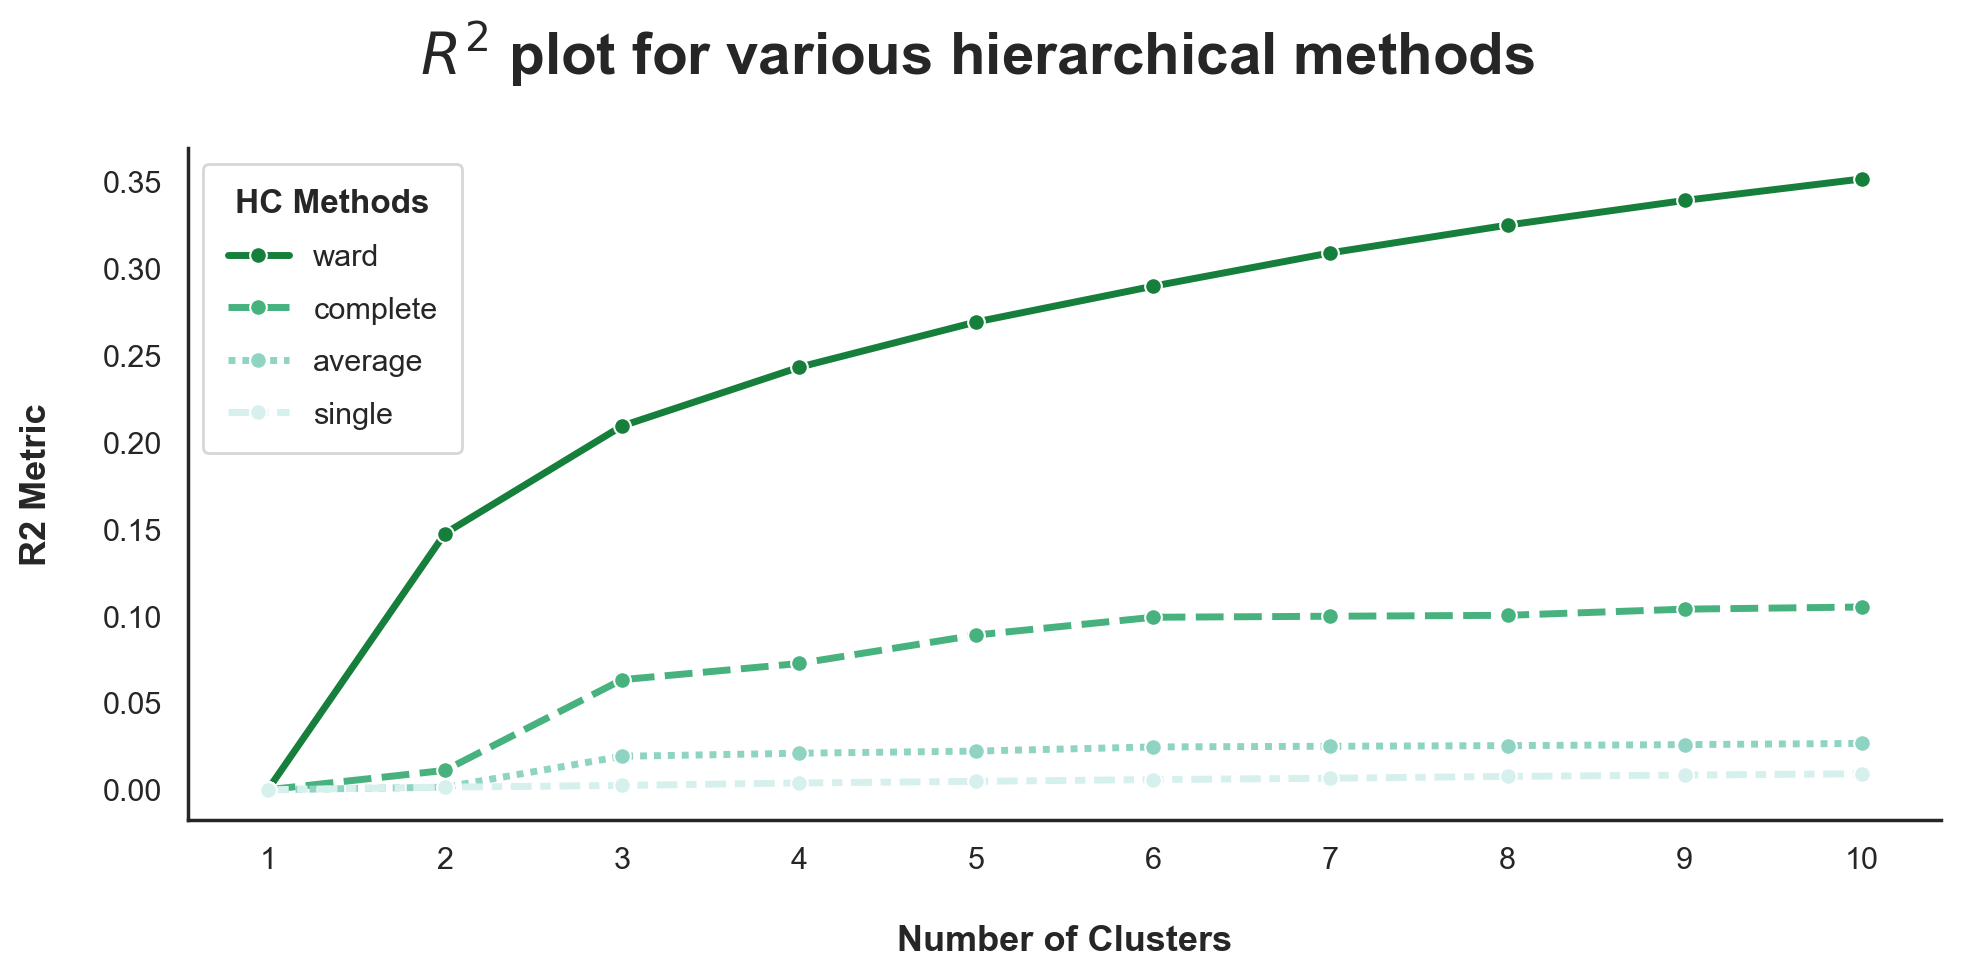

In [ ]:
# Plot the R2 values for the different hierarchical methods
fig = plt.figure(figsize=(10,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4, palette = "BuGn_r")
plt.legend(title="HC Methods", title_fontproperties={'weight':'bold', 'size':'12'}, labelspacing=0.8, borderpad=0.8)
plt.xticks(range(1, max_nclus + 1), fontsize=11)
plt.xlabel("\nNumber of Clusters", fontsize=13, fontweight='bold')
plt.ylabel("R2 Metric\n", fontsize=13, fontweight='bold')
fig.suptitle("$R^2$ plot for various hierarchical methods", fontsize=21, fontweight='bold')

sns.despine(top=True, right=True)
plt.tight_layout()
fig.savefig('./Clustering_Outputs/Hierarchical_Clustering_R2.png', dpi=300, bbox_inches='tight')
plt.show()

> Based on the analysis of the plot, it is recommended to use the **Ward** method with between **$3$ and $6$ clusters**. This method and number of clusters provide a good balance between explaining the variance in the data and maintaining the simplicity of the clustering model.


##### **Defining the Number of Clusters**

In [291]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'

hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(ABCDEats[metric_features])

array([16568, 21473, 23188, ...,     2,     1,     0], dtype=int64)

In [292]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

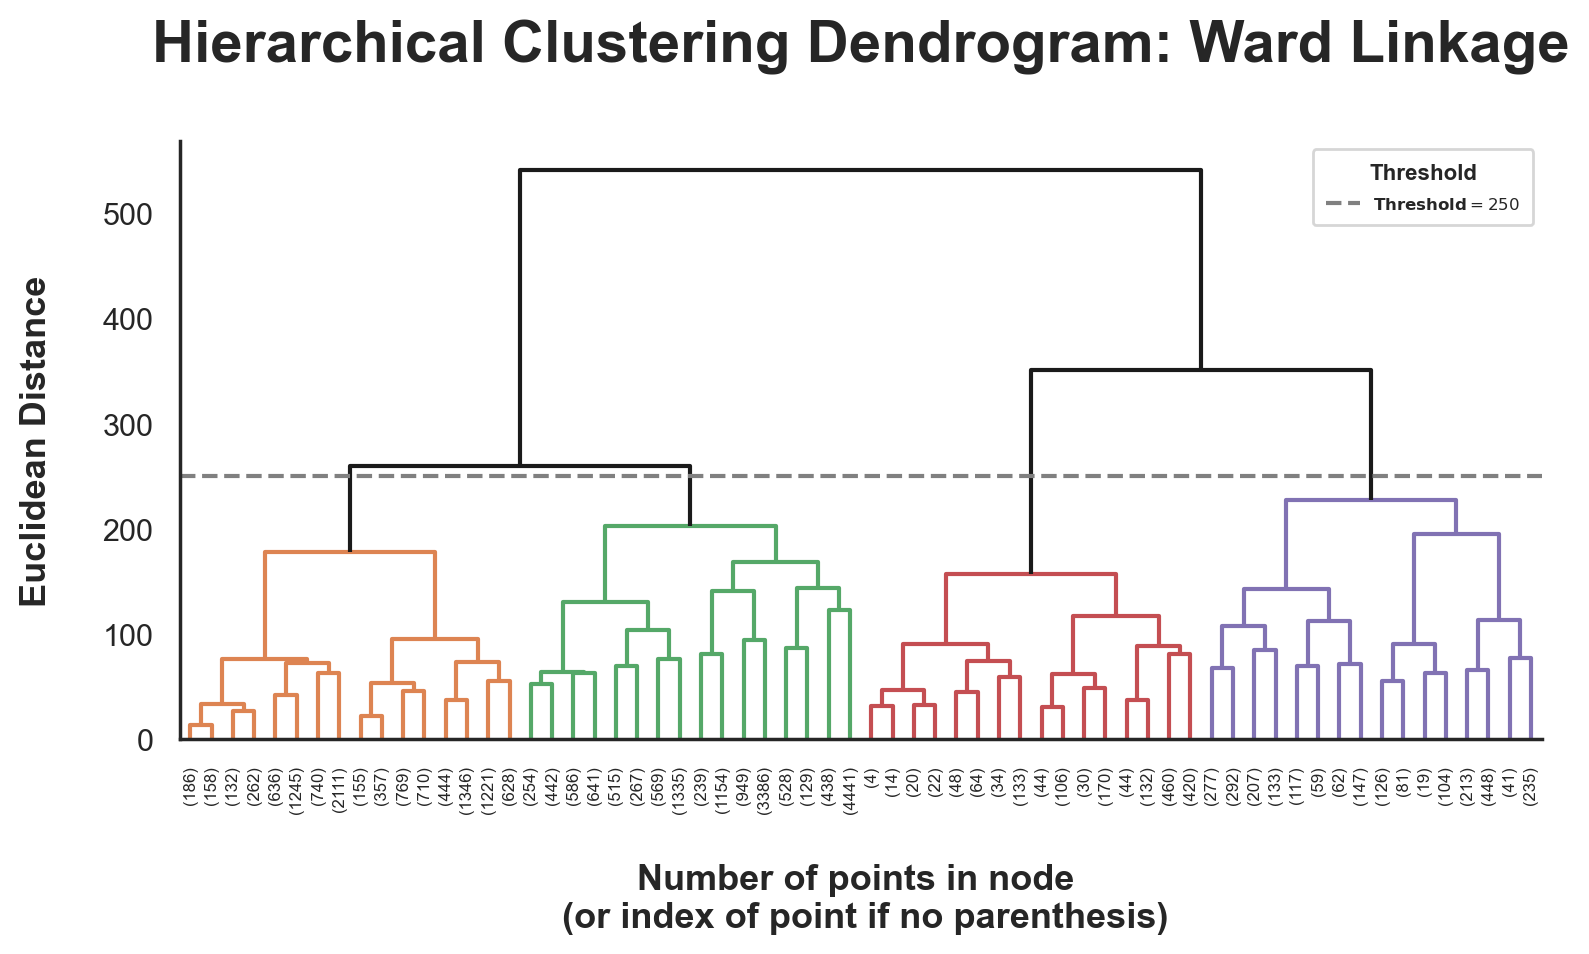

In [307]:
# Plot the corresponding dendrogram
fig = plt.figure(figsize=(8,5))

##########################################
# Visualize the Dendrogram with y_threshold = 250
##########################################

# The Dendrogram parameters need to be tuned
y_threshold = 250
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="grey", linestyles="dashed", label=rf'$\mathbf{{Threshold}} = {y_threshold}$', linewidth=1.5)
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage\n', fontsize=21, fontweight='bold')
plt.xlabel('\nNumber of points in node \n (or index of point if no parenthesis)', fontsize=13, fontweight='bold')
plt.ylabel(f'{distance.title()} Distance\n', fontsize=13, fontweight='bold')
plt.legend(title='Threshold', title_fontproperties={'weight':'bold', 'size':'8'}, labelspacing=0.8, borderpad=0.8, loc='upper right', fontsize=6)

sns.despine(top=True, right=True)
plt.tight_layout()
fig.savefig('./Clustering_Outputs/Hierarchical_Clustering_Dendrogram.png', dpi=300, bbox_inches='tight')
plt.show()

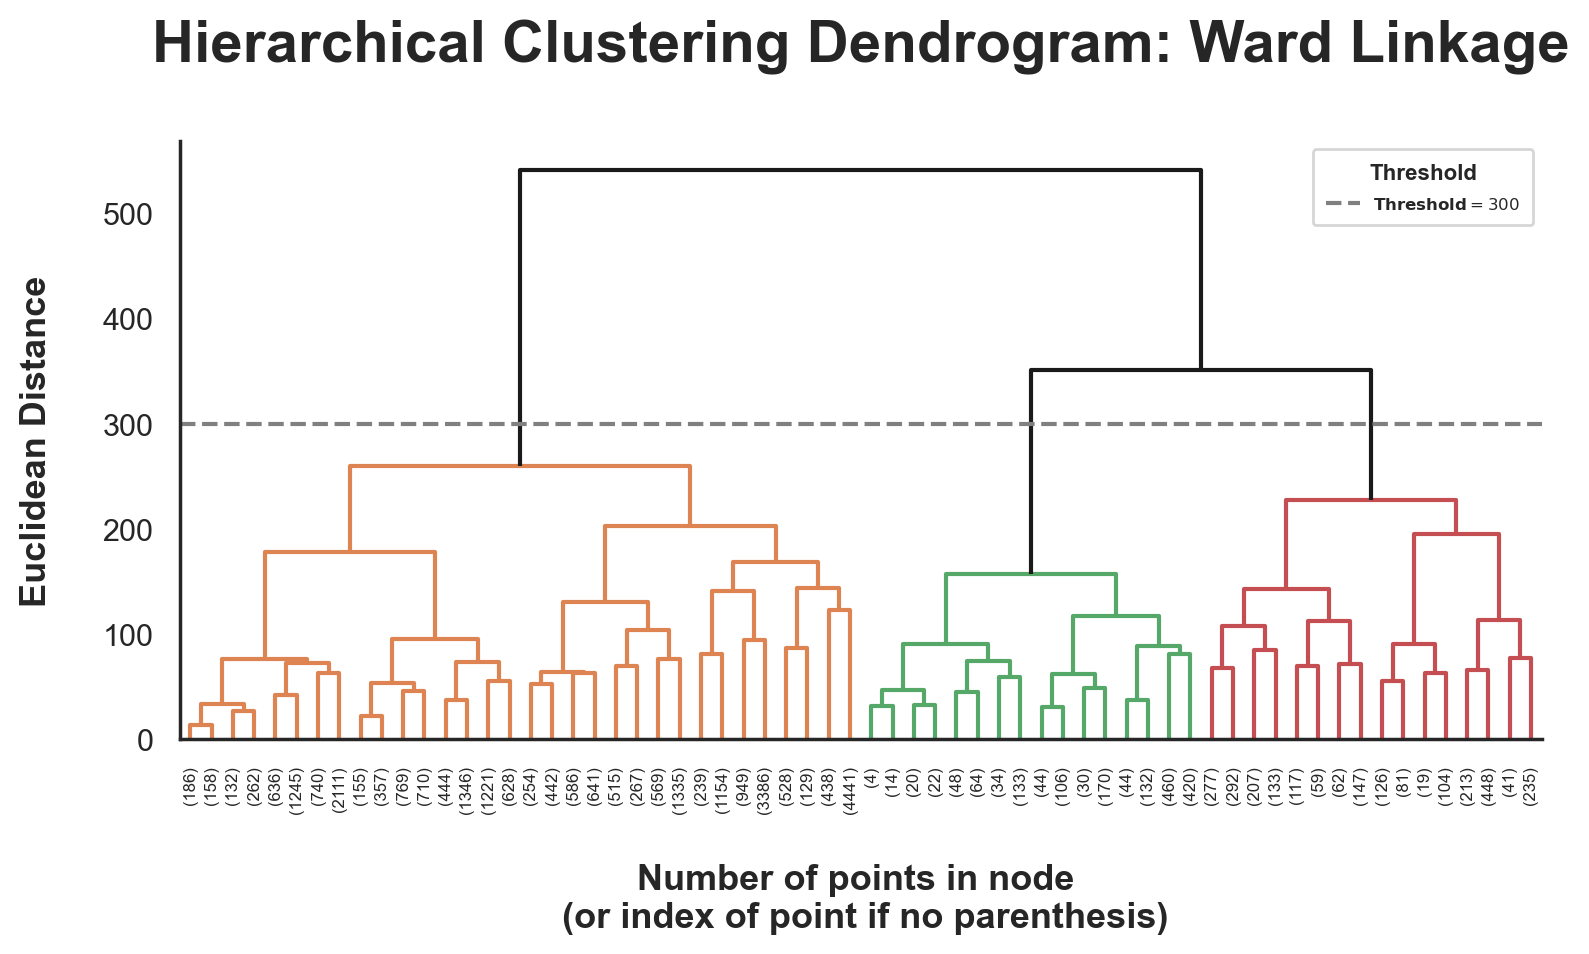

In [308]:
##########################################
# Visualize the Dendrogram with y_threshold = 300
##########################################

fig = plt.figure(figsize=(8,5))
y_threshold = 300
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="grey", linestyles="dashed", label=rf'$\mathbf{{Threshold}} = {y_threshold}$', linewidth=1.5)
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage\n', fontsize=21, fontweight='bold')
plt.xlabel('\nNumber of points in node \n (or index of point if no parenthesis)', fontsize=13, fontweight='bold')
plt.ylabel(f'{distance.title()} Distance\n', fontsize=13, fontweight='bold')
plt.legend(title='Threshold', title_fontproperties={'weight':'bold', 'size':'8'}, labelspacing=0.8, borderpad=0.8, loc='upper right', fontsize=6)

sns.despine(top=True, right=True)
plt.tight_layout()
fig.savefig('./Clustering_Outputs/Hierarchical_Clustering_Dendrogram.png', dpi=300, bbox_inches='tight')
plt.show()

---

## **📏 Clustering Evaluation/Analysis**

In [349]:
# Define the clustering parameters (linkage and distance metric)
linkage = 'ward'
distance = 'euclidean'

# 1st Cluster Solution
n_clusters = 4

hc4_clust = AgglomerativeClustering(n_clusters=n_clusters)
hc4_labels = hc4_clust.fit_predict(ABCDEats[metric_features])

# Characterizing the 4 clusters
df_concat = pd.concat([ABCDEats[metric_features], pd.Series(hc4_labels, name='labels', index=ABCDEats.index)], axis=1)
df_concat.groupby('labels').mean()

,customer_age,chain_count,first_order,last_order,order_count,days_between_orders_per_order,CUI_Total_Amount_Spent,CUI_Total_Food_Types,CUI_Avg_Amount_Spent,CUI_NOTAsian_Italian_OTHER_NOTSnack_PC,CUI_American_Cafe_Japanese_PC,CUI_Chicken_Chinese_Noodle_PC,CUI_Healthy_NOTAmerican_PC,CUI_Indian_PC,CUI_Japanese_NOTBeverages_PC,CUI_Beverages_Thai_PC,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_Lunch_Dinner_PC,HR_LateNight_Breakfast_PC,HR_Evening_PC,HR_AfternoonSnack_PC
labels,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.02,2.07,-0.77,0.75,2.28,-0.31,1.29,1.82,-0.47,1.89,0.95,1.33,-0.41,0.25,-0.18,0.10,1.41,1.39,1.44,1.46,1.49,1.35,1.34,3.71,0.97,0.04,0.38
1,0.01,-0.06,-0.16,0.25,-0.07,0.51,-0.06,0.05,0.02,0.00,-0.06,-0.04,0.07,0.05,0.01,-0.01,-0.07,-0.06,-0.06,-0.04,-0.04,-0.03,-0.03,-0.07,-0.11,-0.03,-0.01
2,0.05,0.45,-0.53,0.62,0.97,0.03,2.14,0.60,0.62,-2.32,1.53,1.33,-0.30,0.31,-0.24,0.16,0.71,0.65,0.79,0.63,0.49,0.49,0.45,-1.00,3.48,-0.21,0.14
3,-0.03,-0.46,0.49,-0.63,-0.57,-0.66,-0.54,-0.58,-0.02,-0.08,-0.38,-0.45,0.05,-0.17,0.07,-0.03,-0.34,-0.34,-0.37,-0.37,-0.36,-0.34,-0.34,-0.60,-0.62,0.06,-0.09


In [350]:
# Absolute and Relative Frequency of the clusters
cluster_freq = hc4_clust.labels_
cluster_freq = pd.Series(cluster_freq).value_counts().sort_index()

# Dataframe with the absolute and relative frequency of the clusters
cluster_freq_df = pd.DataFrame({'n': cluster_freq, '%': (cluster_freq/cluster_freq.sum()*100).round(2)})
cluster_freq_df.index.name = 'Cluster'
cluster_freq_df

,n,%
Cluster,,
0,2561,8.19
1,15873,50.75
2,1745,5.58
3,11100,35.49


In [297]:
# 3 Cluster Solution
hc3_clust = AgglomerativeClustering(n_clusters=3)
hc3_labels = hc3_clust.fit_predict(ABCDEats[metric_features])

# Characterizing the 3 clusters
df_concat = pd.concat([ABCDEats[metric_features], pd.Series(hc3_labels, name='labels', index=ABCDEats.index)], axis=1)
df_concat.groupby('labels').mean()

,customer_age,chain_count,first_order,last_order,order_count,days_between_orders_per_order,CUI_Total_Amount_Spent,CUI_Total_Food_Types,CUI_Avg_Amount_Spent,CUI_NOTAsian_Italian_OTHER_NOTSnack_PC,CUI_American_Cafe_Japanese_PC,CUI_Chicken_Chinese_Noodle_PC,CUI_Healthy_NOTAmerican_PC,CUI_Indian_PC,CUI_Japanese_NOTBeverages_PC,CUI_Beverages_Thai_PC,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_Lunch_Dinner_PC,HR_LateNight_Breakfast_PC,HR_Evening_PC,HR_AfternoonSnack_PC
labels,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.01,-0.23,0.11,-0.11,-0.28,0.03,-0.26,-0.21,0.00,-0.03,-0.19,-0.21,0.06,-0.04,0.03,-0.02,-0.18,-0.17,-0.19,-0.18,-0.17,-0.16,-0.16,-0.29,-0.32,0.01,-0.05
1,0.02,2.07,-0.77,0.75,2.28,-0.31,1.29,1.82,-0.47,1.89,0.95,1.33,-0.41,0.25,-0.18,0.10,1.41,1.39,1.44,1.46,1.49,1.35,1.34,3.71,0.97,0.04,0.38
2,0.05,0.45,-0.53,0.62,0.97,0.03,2.14,0.60,0.62,-2.32,1.53,1.33,-0.30,0.31,-0.24,0.16,0.71,0.65,0.79,0.63,0.49,0.49,0.45,-1.00,3.48,-0.21,0.14


In [298]:
# Absolute and Relative Frequency of the clusters
cluster_freq = hc3_clust.labels_
cluster_freq = pd.Series(cluster_freq).value_counts().sort_index()

# Dataframe with the absolute and relative frequency of the clusters
cluster_freq_df = pd.DataFrame({'n': cluster_freq, '%': (cluster_freq/cluster_freq.sum()*100).round(2)})
cluster_freq_df.index.name = 'Cluster'
cluster_freq_df

,n,%
Cluster,,
0,26973,86.23
1,2561,8.19
2,1745,5.58


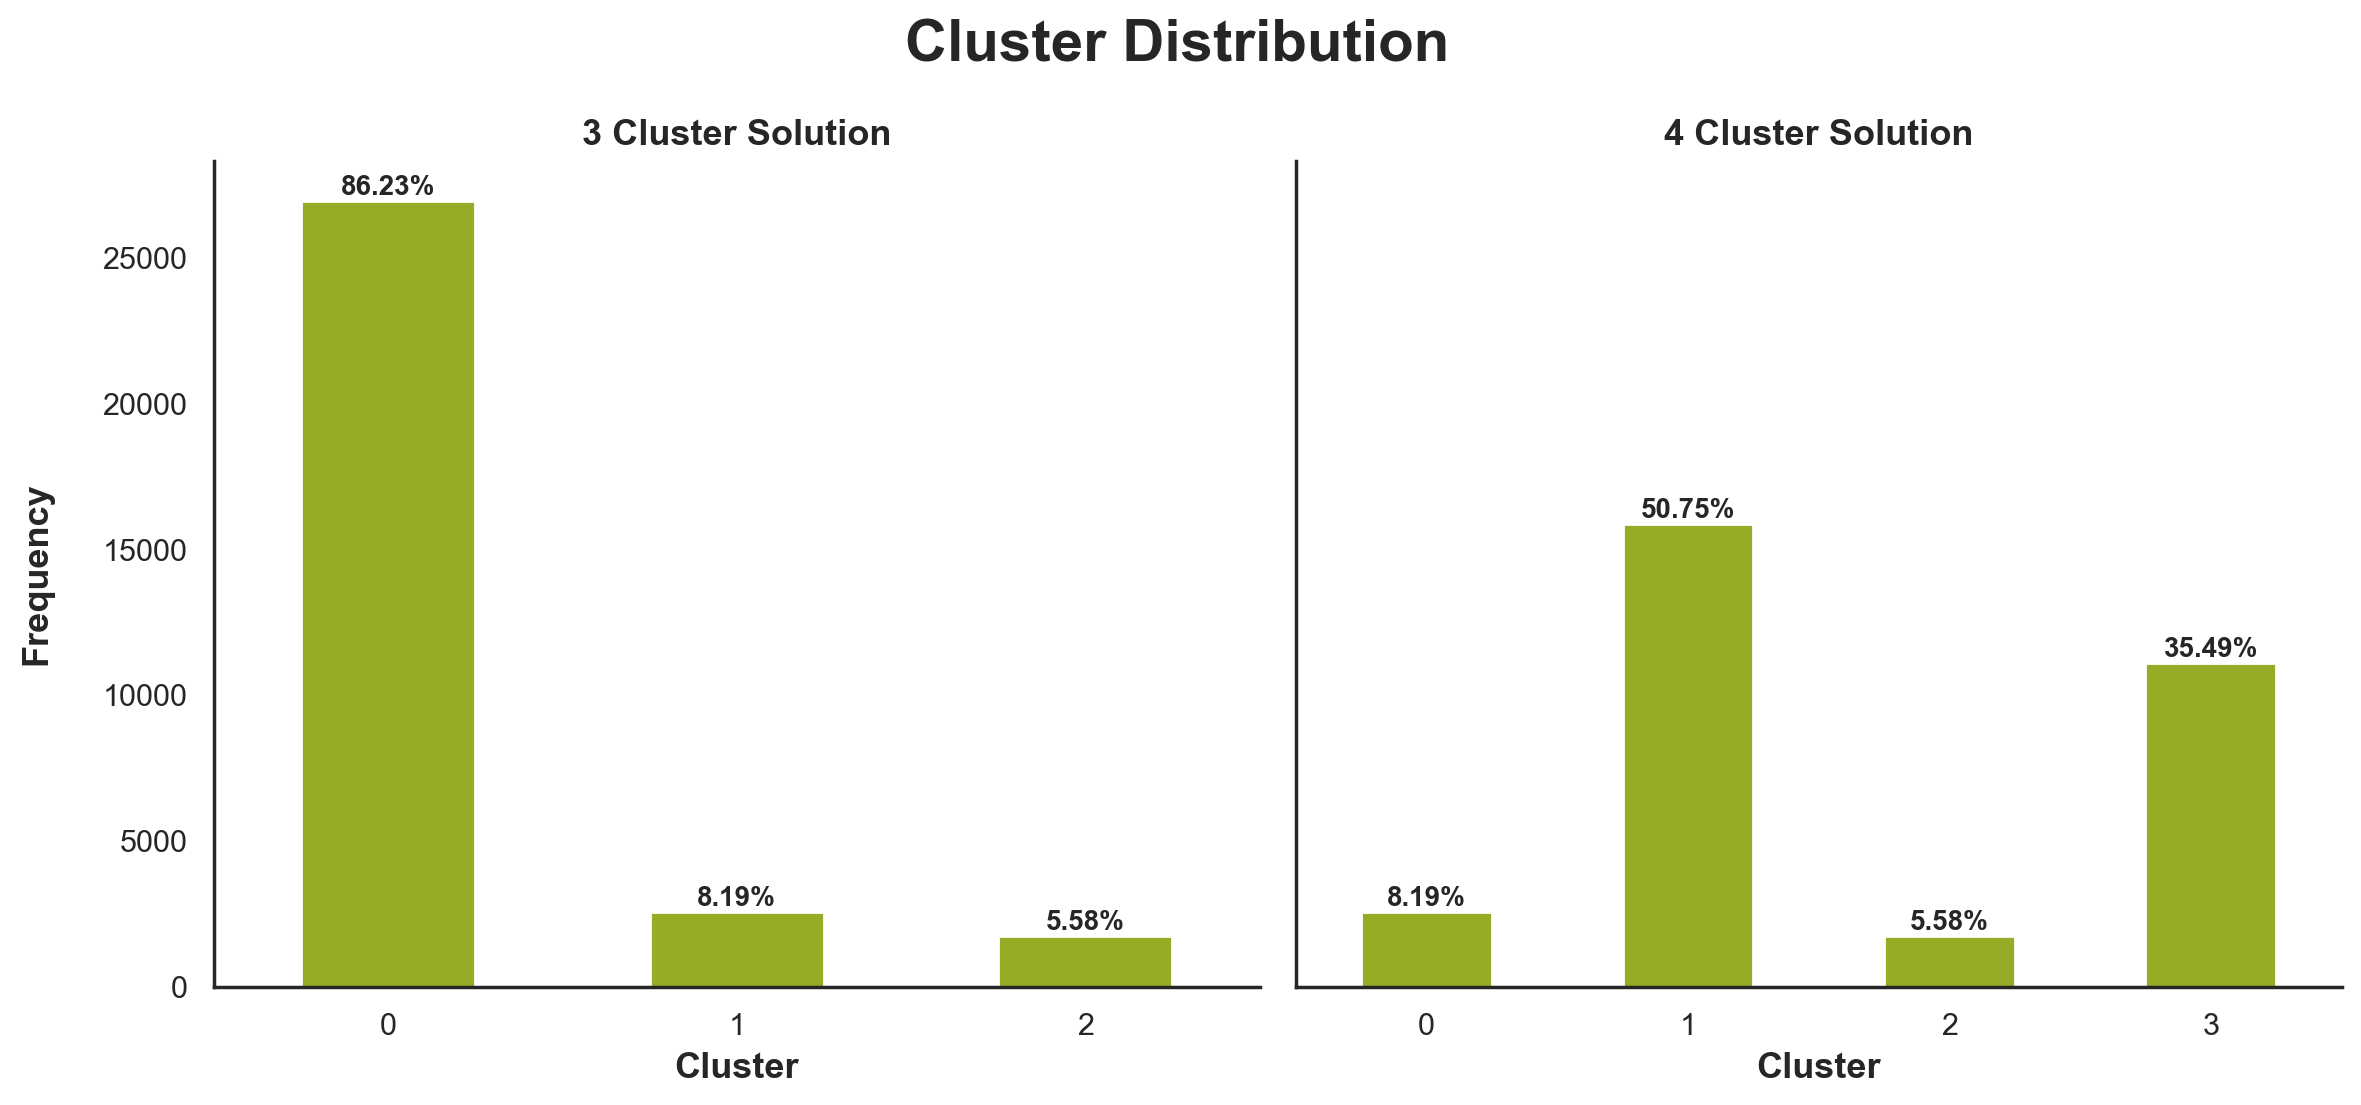

In [309]:
## Barplot of the clusters (3 & 6 solutions in %)
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# 3 Cluster Solution
cluster_freq = hc3_clust.labels_
cluster_freq = pd.Series(cluster_freq).value_counts().sort_index() 

cluster_freq.plot(kind='bar', ax=ax[0], color=NOVAIMS_palette_colors[1])
ax[0].set_title('3 Cluster Solution', fontsize=13, fontweight='bold')
ax[0].set_xlabel('Cluster', fontsize=13, fontweight='bold')
ax[0].set_ylabel('Frequency\n', fontsize=13, fontweight='bold')
ax[0].set_xticklabels(ax[0].get_xticks(), rotation=0)

# Add the percentage above the bars
for i in ax[0].patches:
    ax[0].text(i.get_x() + i.get_width()/2, i.get_height() + 3, f'{i.get_height()/cluster_freq.sum()*100:.2f}%', 
               ha='center', va='bottom', fontsize=10, fontweight='bold')

# 6 Cluster Solution
cluster_freq = hc4_clust.labels_
cluster_freq = pd.Series(cluster_freq).value_counts().sort_index()

cluster_freq.plot(kind='bar', ax=ax[1], color=NOVAIMS_palette_colors[1])
ax[1].set_title('4 Cluster Solution', fontsize=13, fontweight='bold')
ax[1].set_xlabel('Cluster', fontsize=13, fontweight='bold')
ax[1].set_xticklabels(ax[1].get_xticks(), rotation=0)

# Add the percentage above the bars
for i in ax[1].patches:
    ax[1].text(i.get_x() + i.get_width()/2, i.get_height() + 3, f'{i.get_height()/cluster_freq.sum()*100:.2f}%', 
               ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.suptitle('Cluster Distribution\n', fontsize=21, fontweight='bold', y=0.92)
sns.despine(right=True, top=True)
plt.tight_layout()
plt.show()

In [310]:
## See crosstab of 3 vs 4
## What does this mean?

pd.crosstab(pd.Series(hc3_labels, name='hc3_labels', index=ABCDEats.index),
            pd.Series(hc4_labels, name='hc4_labels', index=ABCDEats.index))

hc4_labels,0,1,2,3
hc3_labels,,,,
0,0,15873,0,11100
1,2561,0,0,0
2,0,0,1745,0


### **Final Hierarchical clustering solution**

> Based on the analysis, the **1st Dendrogram** with a threshold of $200$ seems to be the best solution. It offers a good balance between simplicity and the distinction of the clusters, resulting in $4$ clusters.  

> Moreover, based on frequency and cross-tabulation analysis, the **4-cluster solution** provides a good balance between the number of clusters and the distribution of data points across clusters, compared to the **3-cluster solution**. Additionally, the mapping from $3$ clusters to $4$ clusters shows that ***Cluster 0*** in the *3-cluster solution* is merged with ***Cluster 1 + 3*** in the *4-cluster solution*.

In [351]:
ABCDEats = pd.concat([ABCDEats, pd.Series(hc4_labels, name='labels', index=ABCDEats.index)], axis=1)

In [312]:
# Absolute and Relative Frequency of the 4 Cluster Solution
cluster_counts = pd.Series(hc4_labels).value_counts().sort_index()
cluster_freq = pd.Series(hc4_labels).value_counts(normalize=True).sort_index() * 100

# Create a DataFrame with the absolute and relative frequency of the clusters
cluster_freq_df = pd.concat([cluster_counts, cluster_freq], axis=1)
cluster_freq_df.columns = ['n', '%']
cluster_freq_df.index.name = 'Cluster'
cluster_freq_df

,n,%
Cluster,,
0,2561,8.19
1,15873,50.75
2,1745,5.58
3,11100,35.49


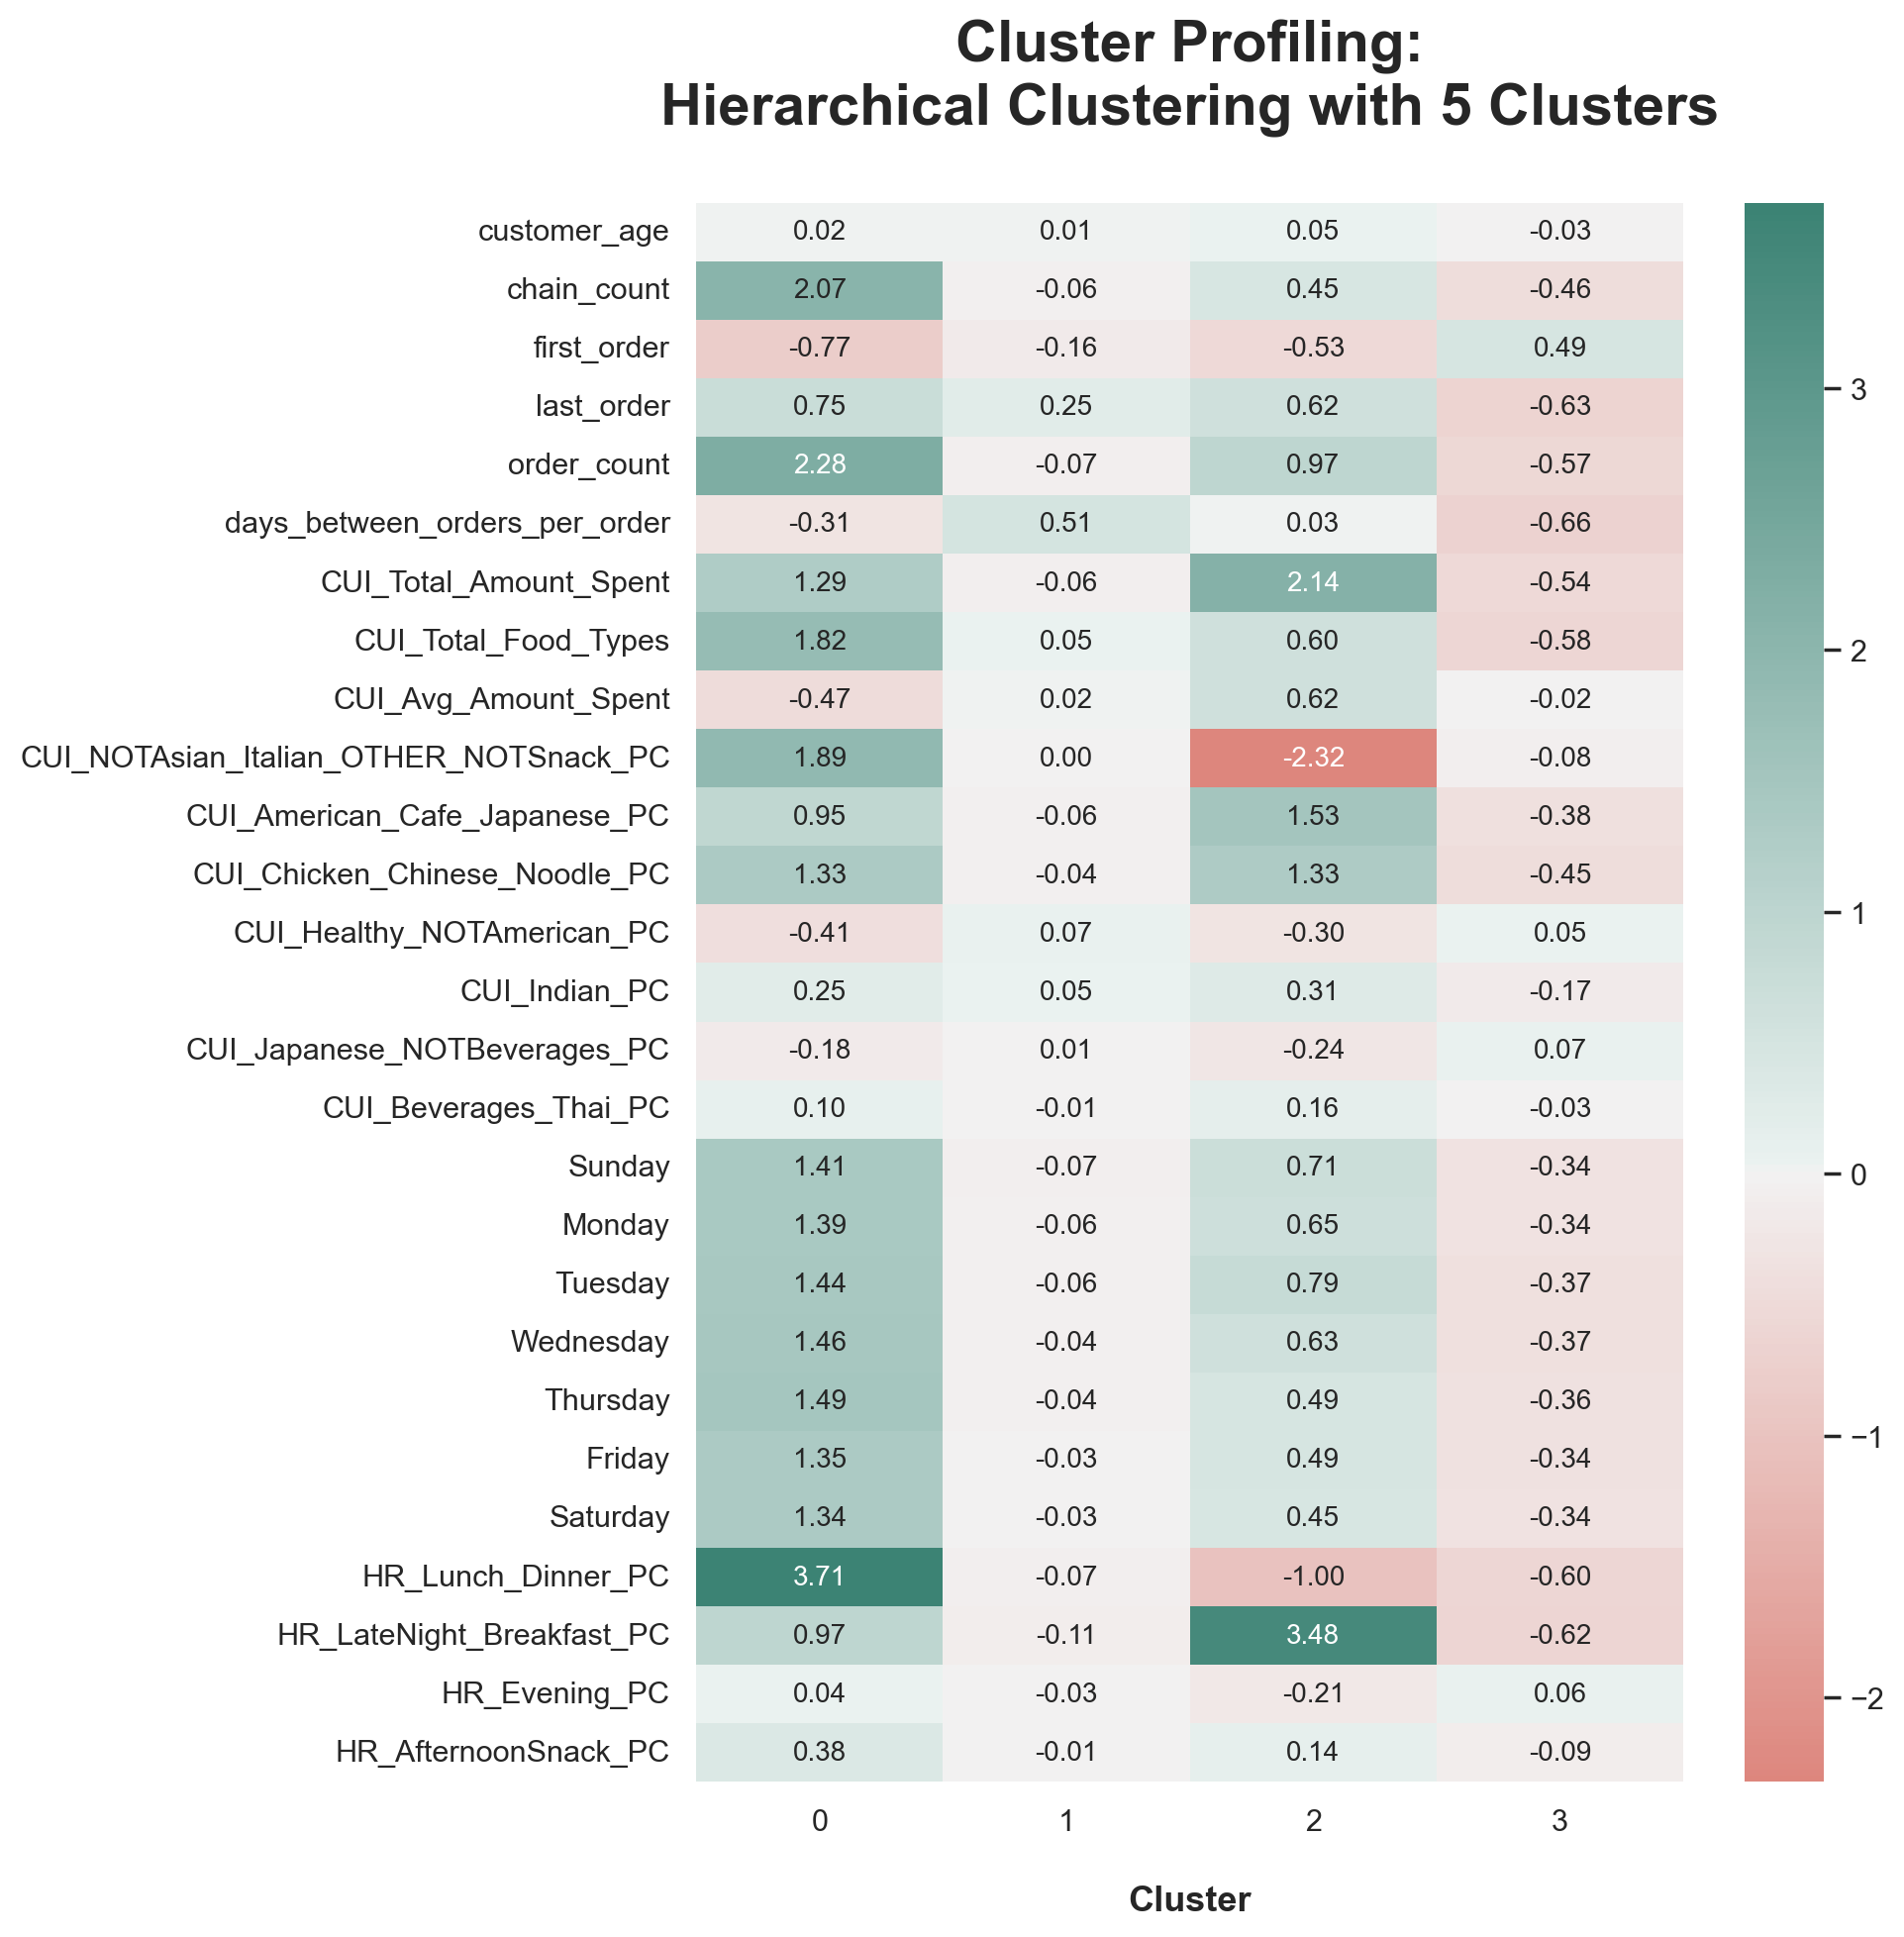

In [314]:
#### Visualize the cluster means as a heatmap to the population means. 
# Explain these values for the population means.
fig, ax = plt.subplots(figsize=(10, 10))

# Color palette for the heatmap with center = 0 (white)
cmap_ = sns.diverging_palette(15, 530, as_cmap=True)
df_concat = pd.concat([ABCDEats[metric_features], pd.Series(hc4_labels, name='labels', index=ABCDEats.index)], axis=1)
sns.heatmap(df_concat.groupby('labels').mean().T, cmap=cmap_, annot=True, fmt=".2f", center= 0, ax=ax, annot_kws={"size": 10})

# Finalize the plot
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('\nCluster', fontsize=13, fontweight='bold')
ax.set_title("Cluster Profiling:\nHierarchical Clustering with 5 Clusters\n", fontsize=21, fontweight='bold')

plt.tight_layout()
fig.savefig('./Clustering_Outputs/Hierarchical_Clustering_5_Clusters.png', dpi=300, bbox_inches='tight')
plt.show()

---

# **👀 Different Perspectives**

## **1. Value-Based Segmentation**

**Variables Used:**
- `CUI_Total_Amount_Spent`,`CUI_Avg_Amount_Spent`, `CUI_Total_Food_Types`
- `order_count`
- `chain_count`
- `days_between_orders_per_order`

**Objectives:**
- Identify high-value customers who contribute significantly to the company's revenue.
- Understand the spending patterns and frequency of orders to tailor marketing strategies.
- Enhance customer retention by focusing on high-value segments.

**Possible Business Applications:**
- **Loyalty Programs:** Implement loyalty programs to reward high-value customers and encourage repeat purchases.
- **Personalized Offers:** Create personalized discounts and promotions for high-value customers to increase their order frequency.
- **Targeted Marketing:** Develop targeted marketing campaigns to attract and retain high-value customers.

## **2. Behavior-Based Segmentation**

**Variables Used:**
- `customer_age`
- `first_order`, `last_order`
- `HR_Lunch_Dinner_PC`, `HR_LateNight_Breakfast_PC`, `HR_Evening_PC`, `HR_AfternoonSnack_PC`
- `Sunday`, `Monday`, `Tuesday`, `Wednesday`, `Thursday`, `Friday`, `Saturday`
- `CUI_NOTAsian_Italian_OTHER_NOTSnack_PC`, `CUI_American_Cafe_Japanese_PC`, `CUI_Chicken_Chinese_Noodle_PC`, `CUI_Healthy_NOTAmerican_PC`, `CUI_Indian_PC`, `CUI_Japanese_NOTBeverages_PC`, `CUI_Beverages_Thai_PC`

<div class="alert alert-block alert-danger" style="font-size:30px;">

> FAZ SENTIDO TERMOS AS COZINHAS NA 2º PERSPETIVA SENDO QUE ELAS SÃO APENAS O VALOR QUE CADA INDIVIDUO GASTA EM CADA COZINHA?

</div>

**Objectives:**
- Understand customer purchasing habits and preferences.
- Identify patterns in order timing and frequency to optimize service offerings.
- Tailor marketing strategies to different behavioral segments to improve customer satisfaction and engagement.

**Possible Business Applications:**
- **Promotional Campaigns:** Design promotional campaigns targeting customers who are sensitive to discounts and offers.
- **Time-Based Offers:** Create time-based offers to attract customers who order during specific hours or days.
- **Frequency Incentives:** Implement incentives to increase order frequency for customers who order less often.
- **Personalized Recommendations:** Use behavioral data to provide personalized recommendations and improve the customer experience.

In [315]:
# List of variables in different perspectives
value_vars = ['CUI_Total_Amount_Spent', 'CUI_Total_Food_Types', 'CUI_Avg_Amount_Spent', 
              'order_count', 
              'days_between_orders_per_order', 
              'chain_count']

behavior_vars = ['customer_age',
                 'first_order', 'last_order',
                 
                 'CUI_NOTAsian_Italian_OTHER_NOTSnack_PC', 'CUI_American_Cafe_Japanese_PC', 
                 'CUI_Chicken_Chinese_Noodle_PC', 'CUI_Healthy_NOTAmerican_PC', 
                 'CUI_Indian_PC', 'CUI_Japanese_NOTBeverages_PC', 'CUI_Beverages_Thai_PC',
                 
                 'HR_Lunch_Dinner_PC', 'HR_LateNight_Breakfast_PC', 'HR_Evening_PC', 'HR_AfternoonSnack_PC',
                 
                 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

## **Value-based Segments**

In [223]:
hc_methods = ["ward", "complete", "average", "single"]
max_nclus = 10

r2_hc = np.vstack([get_r2_hc(ABCDEats[value_vars], 
                             link, 
                             max_nclus=max_nclus, 
                             min_nclus=1, 
                             dist="euclidean") 
                             for link in hc_methods])

# Create a DataFrame with the R2 values
r2_hc_methods = pd.DataFrame(r2_hc.T, index=range(1, max_nclus + 1), columns=hc_methods)

## Time of Execution = 12m 50s 

100%|██████████| 10/10 [00:36<00:00,  3.70s/it]


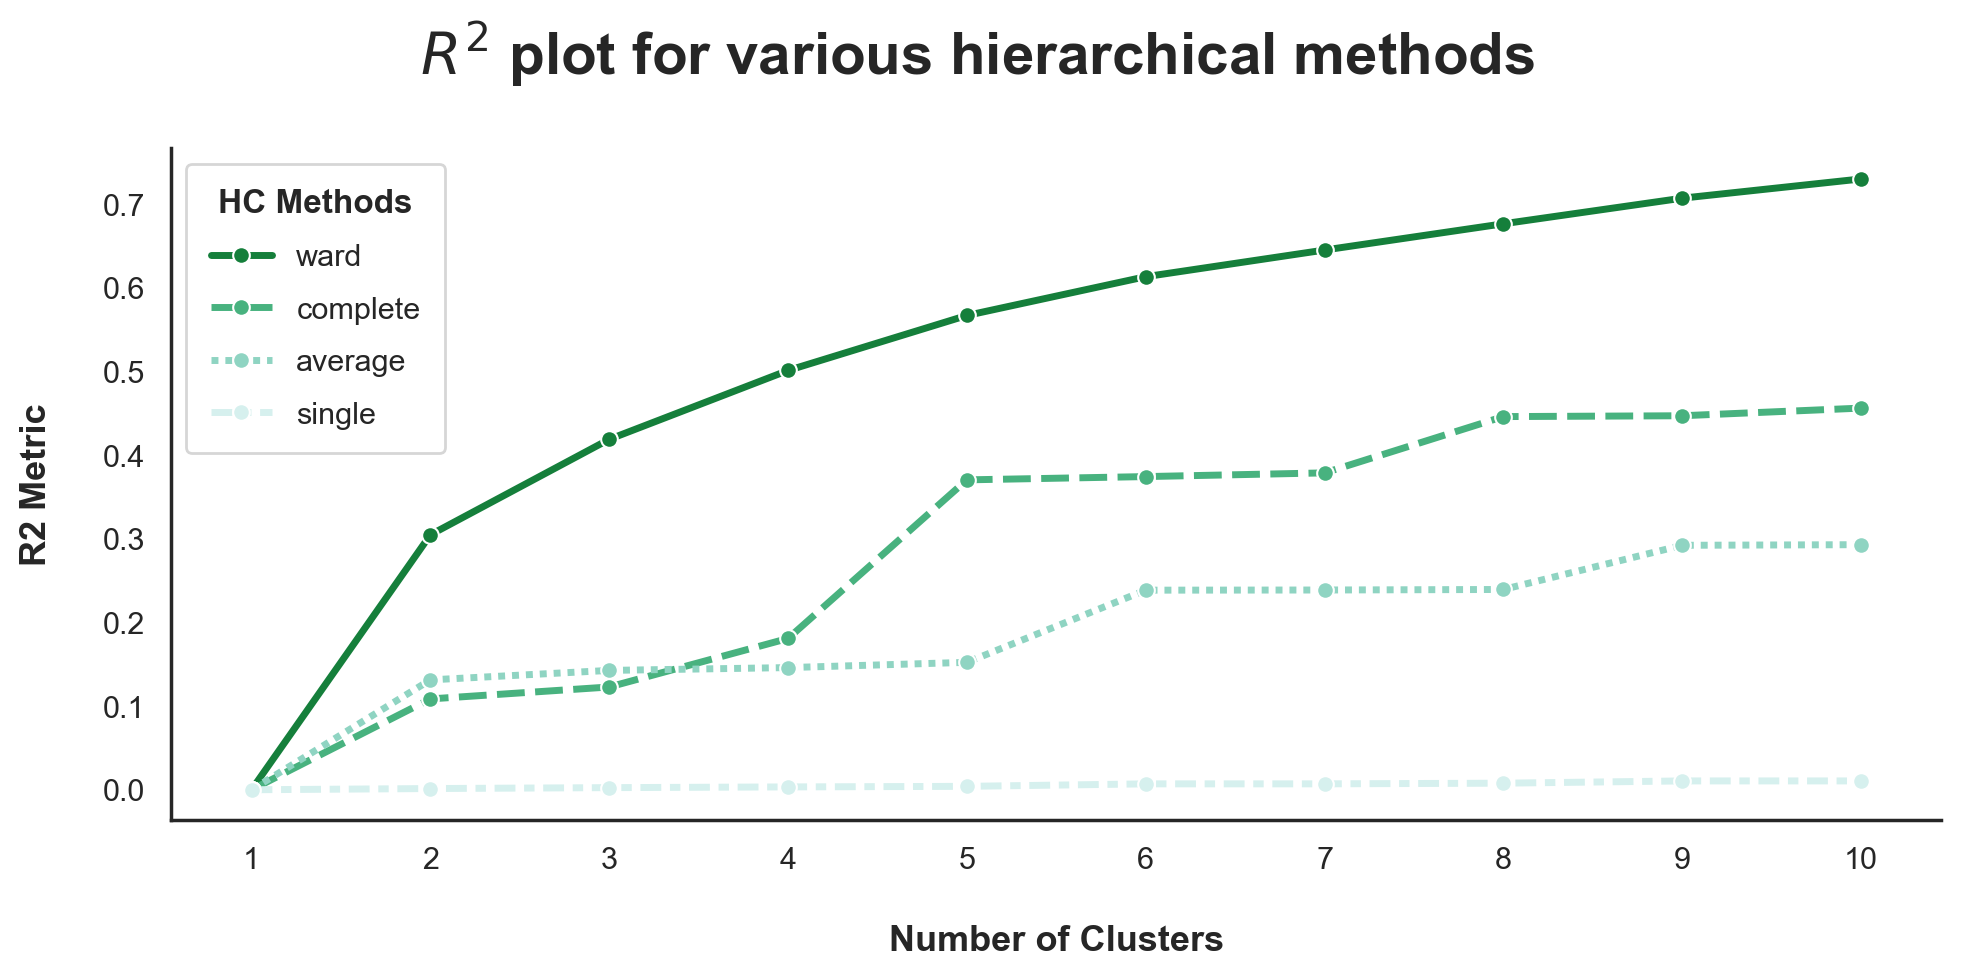

In [ ]:
# Plot the R2 values for the different hierarchical methods
fig = plt.figure(figsize=(10,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4, palette = "BuGn_r")
plt.legend(title="HC Methods", title_fontproperties={'weight':'bold', 'size':'12'}, labelspacing=0.8, borderpad=0.8)
plt.xticks(range(1, max_nclus + 1), fontsize=11)
plt.xlabel("\nNumber of Clusters", fontsize=13, fontweight='bold')
plt.ylabel("R2 Metric\n", fontsize=13, fontweight='bold')
fig.suptitle("$R^2$ plot for various hierarchical methods", fontsize=21, fontweight='bold')

sns.despine(top=True, right=True)
plt.tight_layout()
fig.savefig('./Clustering_Outputs/Hierarchical_Clustering_ValuePerspective_R2.png', dpi=300, bbox_inches='tight')
plt.show()

> Based on plot analysis, the **Ward** method with between **$3$ and $6$ clusters** (elbow point) is recommended.

##### **Defining the Number of Clusters**

In [318]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'

hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(ABCDEats[value_vars])

array([21836, 22692, 25048, ...,     6,     2,     0], dtype=int64)

In [319]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

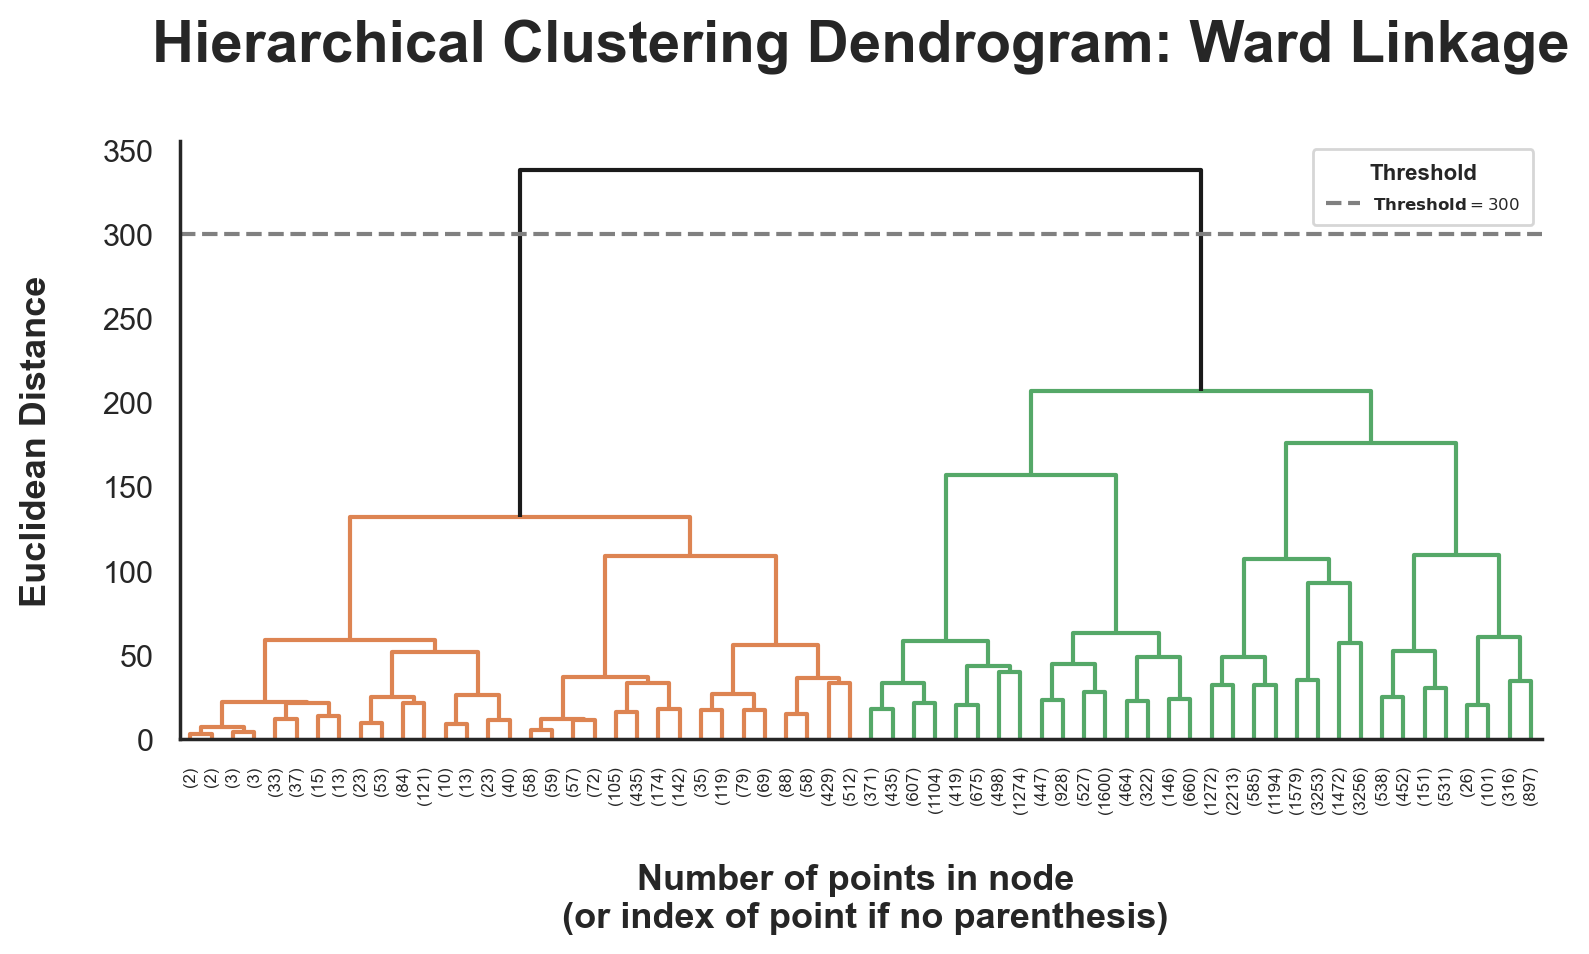

In [320]:
# Plot the corresponding dendrogram
fig = plt.figure(figsize=(8,5))

##########################################
# Visualize the Dendrogram with y_threshold = 300
##########################################

# The Dendrogram parameters need to be tuned
y_threshold = 300
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="grey", linestyles="dashed", label=rf'$\mathbf{{Threshold}} = {y_threshold}$', linewidth=1.5)
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage\n', fontsize=21, fontweight='bold')
plt.xlabel('\nNumber of points in node \n (or index of point if no parenthesis)', fontsize=13, fontweight='bold')
plt.ylabel(f'{distance.title()} Distance\n', fontsize=13, fontweight='bold')
plt.legend(title='Threshold', title_fontproperties={'weight':'bold', 'size':'8'}, labelspacing=0.8, borderpad=0.8, loc='upper right', fontsize=6)

sns.despine(top=True, right=True)
plt.tight_layout()
fig.savefig('./Clustering_Outputs/Hierarchical_Clustering_ValuePerspective_Dendrogram.png', dpi=300, bbox_inches='tight')
plt.show()

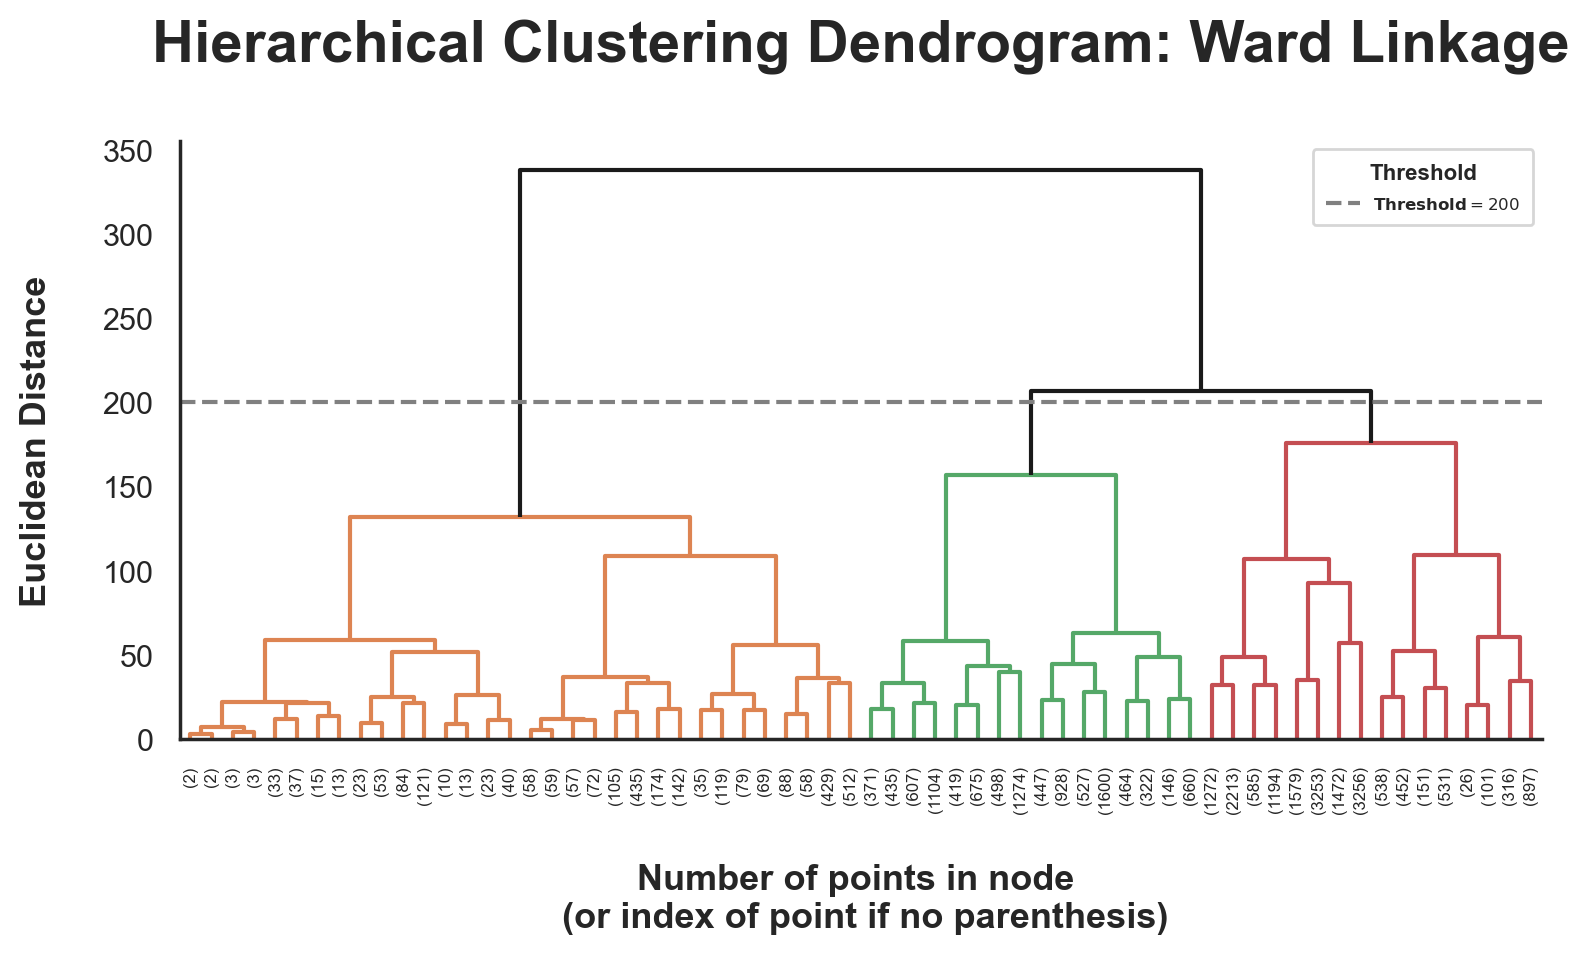

In [321]:
##########################################
# Visualize the Dendrogram with y_threshold = 200
##########################################

fig = plt.figure(figsize=(8,5))
y_threshold = 200
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="grey", linestyles="dashed", label=rf'$\mathbf{{Threshold}} = {y_threshold}$', linewidth=1.5)
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage\n', fontsize=21, fontweight='bold')
plt.xlabel('\nNumber of points in node \n (or index of point if no parenthesis)', fontsize=13, fontweight='bold')
plt.ylabel(f'{distance.title()} Distance\n', fontsize=13, fontweight='bold')
plt.legend(title='Threshold', title_fontproperties={'weight':'bold', 'size':'8'}, labelspacing=0.8, borderpad=0.8, loc='upper right', fontsize=6)

sns.despine(top=True, right=True)
plt.tight_layout()
fig.savefig('./Clustering_Outputs/Hierarchical_Clustering_ValuePerspective_Dendrogram.png', dpi=300, bbox_inches='tight')
plt.show()

---

### **📏 Clustering Evaluation/Analysis**

In [322]:
# Define the clustering parameters (linkage and distance metric)
linkage = 'ward'
distance = 'euclidean'

# 2 Cluster Solution
n_clusters = 2

hc2_clust = AgglomerativeClustering(n_clusters=n_clusters)
hc2_labels = hc2_clust.fit_predict(ABCDEats[value_vars])

# Characterizing the 2 clusters
df_concat = pd.concat([ABCDEats[value_vars], pd.Series(hc2_labels, name='labels_value', index=ABCDEats.index)], axis=1)
df_concat.groupby('labels_value').mean()

,CUI_Total_Amount_Spent,CUI_Total_Food_Types,CUI_Avg_Amount_Spent,order_count,days_between_orders_per_order,chain_count
labels_value,,,,,,
0,-0.20,-0.20,0.02,-0.25,0.04,-0.22
1,1.93,1.92,-0.21,2.35,-0.35,2.08


In [323]:
# Absolute and Relative Frequency of the clusters [Value-based Segmentation - 2 Clusters]
cluster_freq = hc2_clust.labels_
cluster_freq = pd.Series(cluster_freq).value_counts().sort_index()

# Dataframe with the absolute and relative frequency of the clusters
cluster_freq_df = pd.DataFrame({'n': cluster_freq, '%': (cluster_freq/cluster_freq.sum()*100).round(2)})
cluster_freq_df.index.name = 'Cluster'
cluster_freq_df

,n,%
Cluster,,
0,28313,90.52
1,2966,9.48


In [324]:
# 4 Cluster Solution
hc4_clust = AgglomerativeClustering(n_clusters=4)
hc4_labels = hc4_clust.fit_predict(ABCDEats[value_vars])

# Characterizing the 4 clusters
df_concat = pd.concat([ABCDEats[value_vars], pd.Series(hc4_labels, name='labels_value', index=ABCDEats.index)], axis=1)
df_concat.groupby('labels_value').mean()

,CUI_Total_Amount_Spent,CUI_Total_Food_Types,CUI_Avg_Amount_Spent,order_count,days_between_orders_per_order,chain_count
labels_value,,,,,,
0,-0.16,0.38,-0.33,0.03,0.85,0.08
1,1.93,1.92,-0.21,2.35,-0.35,2.08
2,0.75,-0.33,2.02,-0.23,-0.29,-0.38
3,-0.43,-0.59,-0.13,-0.44,-0.47,-0.40


In [325]:
# Absolute and Relative Frequency of the clusters [Value-based Segmentation - 4 Clusters]
cluster_freq = hc4_clust.labels_
cluster_freq = pd.Series(cluster_freq).value_counts().sort_index()

# Dataframe with the absolute and relative frequency of the clusters
cluster_freq_df = pd.DataFrame({'n': cluster_freq, '%': (cluster_freq/cluster_freq.sum()*100).round(2)})
cluster_freq_df.index.name = 'Cluster'
cluster_freq_df

,n,%
Cluster,,
0,10477,33.50
1,2966,9.48
2,3012,9.63
3,14824,47.39


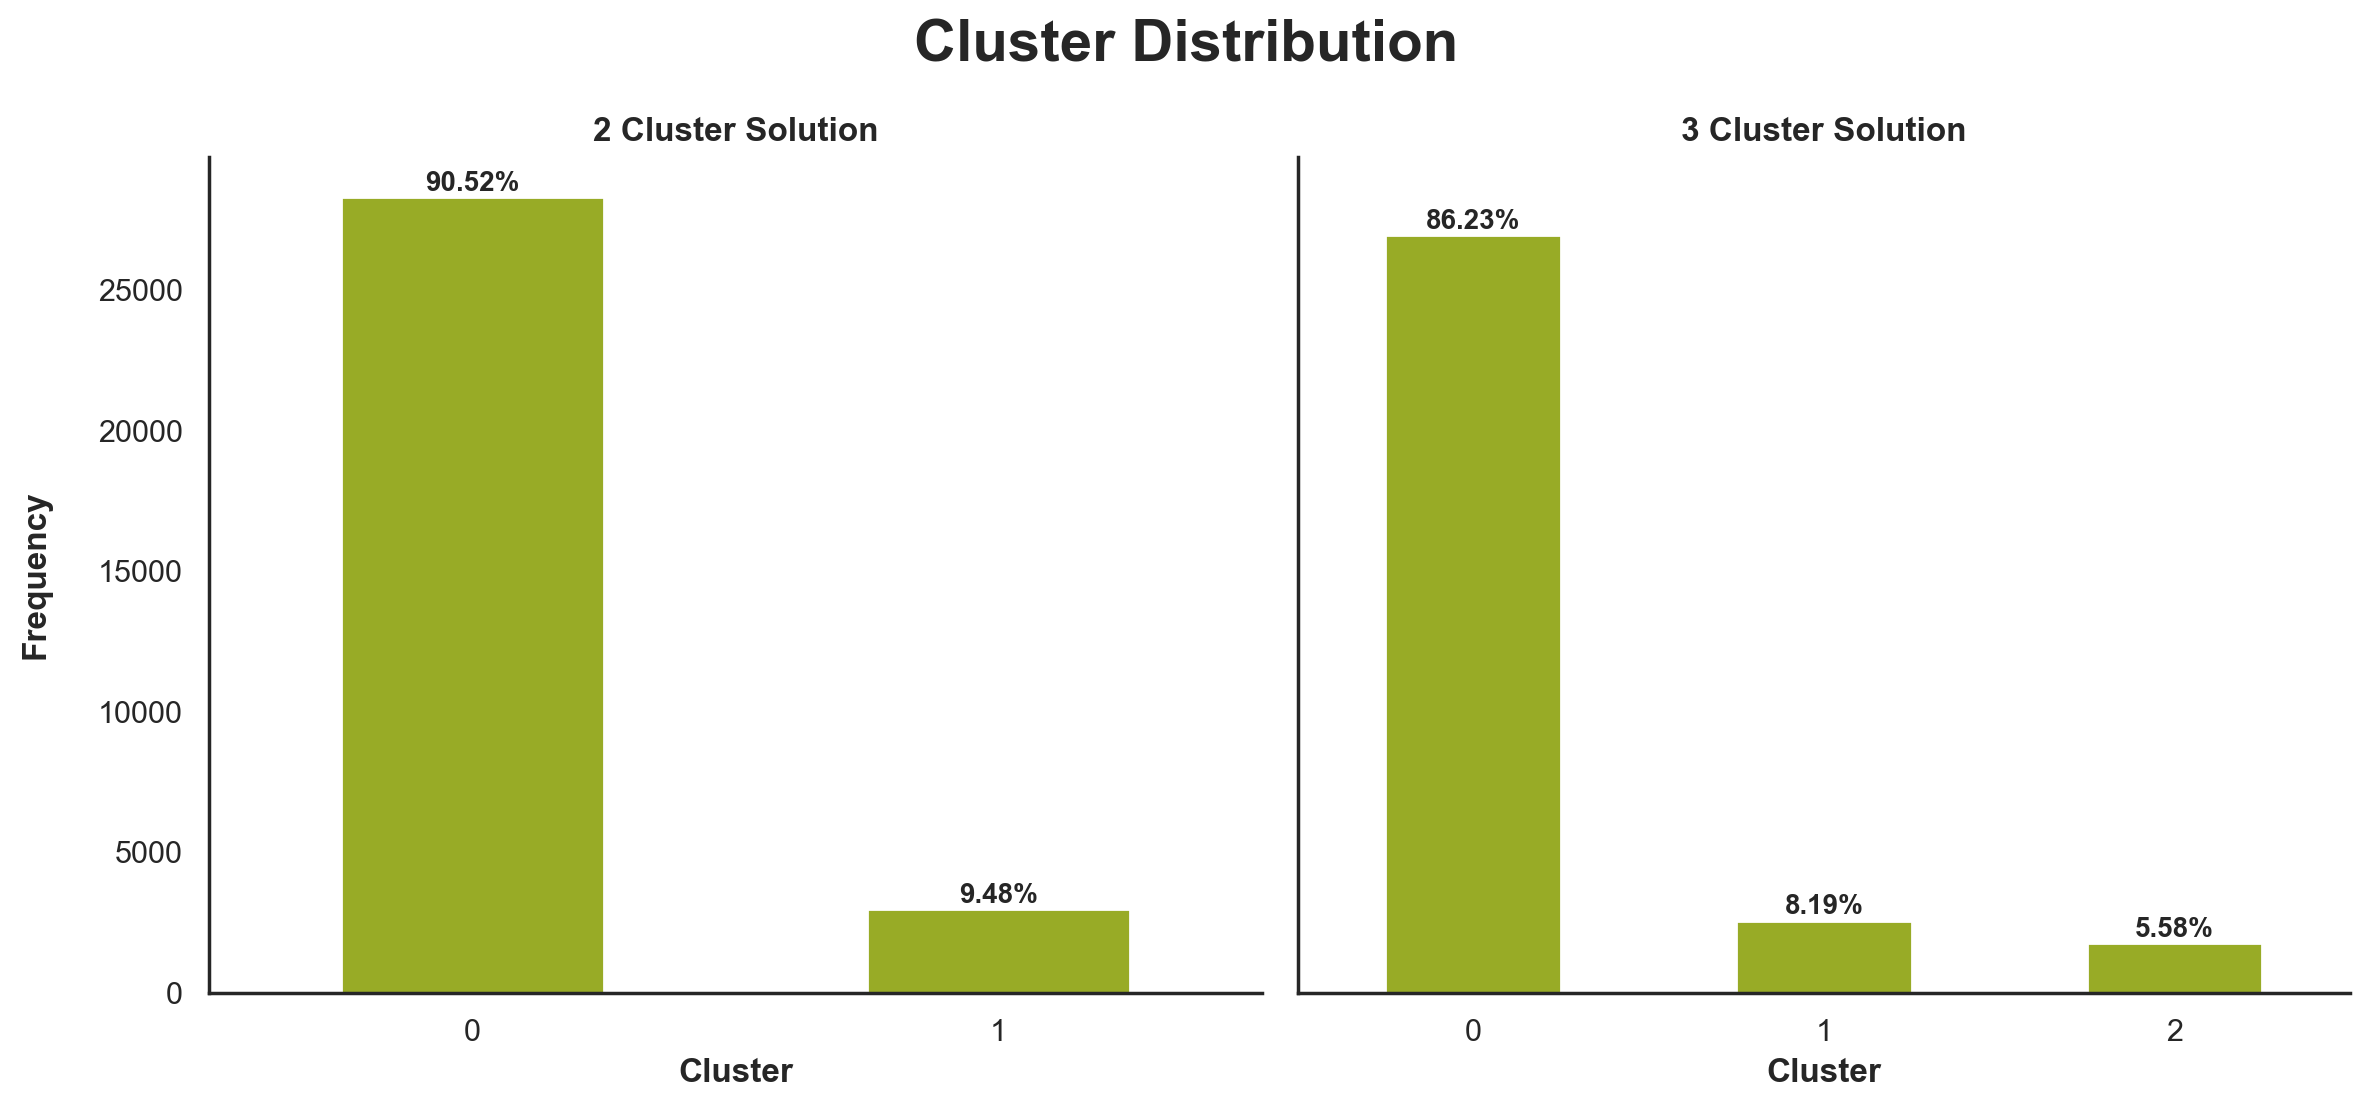

In [326]:
## Barplot of the clusters (2 & 3 solutions in %)
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# 2 Cluster Solution
cluster_freq = hc2_clust.labels_
cluster_freq = pd.Series(cluster_freq).value_counts().sort_index() 

cluster_freq.plot(kind='bar', ax=ax[0], color=NOVAIMS_palette_colors[1])
ax[0].set_title('2 Cluster Solution', fontsize=12, fontweight='bold')
ax[0].set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax[0].set_ylabel('Frequency\n', fontsize=12, fontweight='bold')
ax[0].set_xticklabels(ax[0].get_xticks(), rotation=0)

# Add the percentage above the bars
for i in ax[0].patches:
    ax[0].text(i.get_x() + i.get_width()/2, i.get_height() + 3, f'{i.get_height()/cluster_freq.sum()*100:.2f}%', 
               ha='center', va='bottom', fontsize=10, fontweight='bold')
    
# 3 Cluster Solution
cluster_freq = hc3_clust.labels_
cluster_freq = pd.Series(cluster_freq).value_counts().sort_index()

cluster_freq.plot(kind='bar', ax=ax[1], color=NOVAIMS_palette_colors[1])
ax[1].set_title('3 Cluster Solution', fontsize=12, fontweight='bold')
ax[1].set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax[1].set_xticklabels(ax[1].get_xticks(), rotation=0)

# Add the percentage above the bars
for i in ax[1].patches:
    ax[1].text(i.get_x() + i.get_width()/2, i.get_height() + 3, f'{i.get_height()/cluster_freq.sum()*100:.2f}%', 
               ha='center', va='bottom', fontsize=10, fontweight='bold')
    
plt.suptitle('Cluster Distribution\n', fontsize=21, fontweight='bold', y=0.92)
sns.despine(right=True, top=True)
plt.tight_layout()
plt.show()

In [327]:
## See crosstab of 2 vs 3
## What does this mean?

pd.crosstab(pd.Series(hc2_labels, name='hc2_labels', index=ABCDEats.index),
            pd.Series(hc3_labels, name='hc3_labels', index=ABCDEats.index))

hc3_labels,0,1,2
hc2_labels,,,
0,26562,719,1032
1,411,1842,713


### **Final Hierarchical clustering solution [Value-based Segments]**

> The dendrogram with a threshold of $200$ provides a more balanced and meaningful clustering solution. It results in ***3 clusters*** with a more even distribution of points, which is typically desirable in clustering analysis.

In [328]:
# Save the final solution to ABCDEats dataset
ABCDEats = pd.concat([ABCDEats, pd.Series(hc3_labels, name='labels_value', index=ABCDEats.index)], axis=1)

In [329]:
# Absolute and Relative Frequency of the 4 Cluster Solution
cluster_counts = pd.Series(hc3_labels).value_counts().sort_index()
cluster_freq = pd.Series(hc3_labels).value_counts(normalize=True).sort_index() * 100

# Create a DataFrame with the absolute and relative frequency of the clusters
cluster_freq_df = pd.concat([cluster_counts, cluster_freq], axis=1)
cluster_freq_df.columns = ['n', '%']
cluster_freq_df.index.name = 'Cluster'
cluster_freq_df

,n,%
Cluster,,
0,26973,86.23
1,2561,8.19
2,1745,5.58


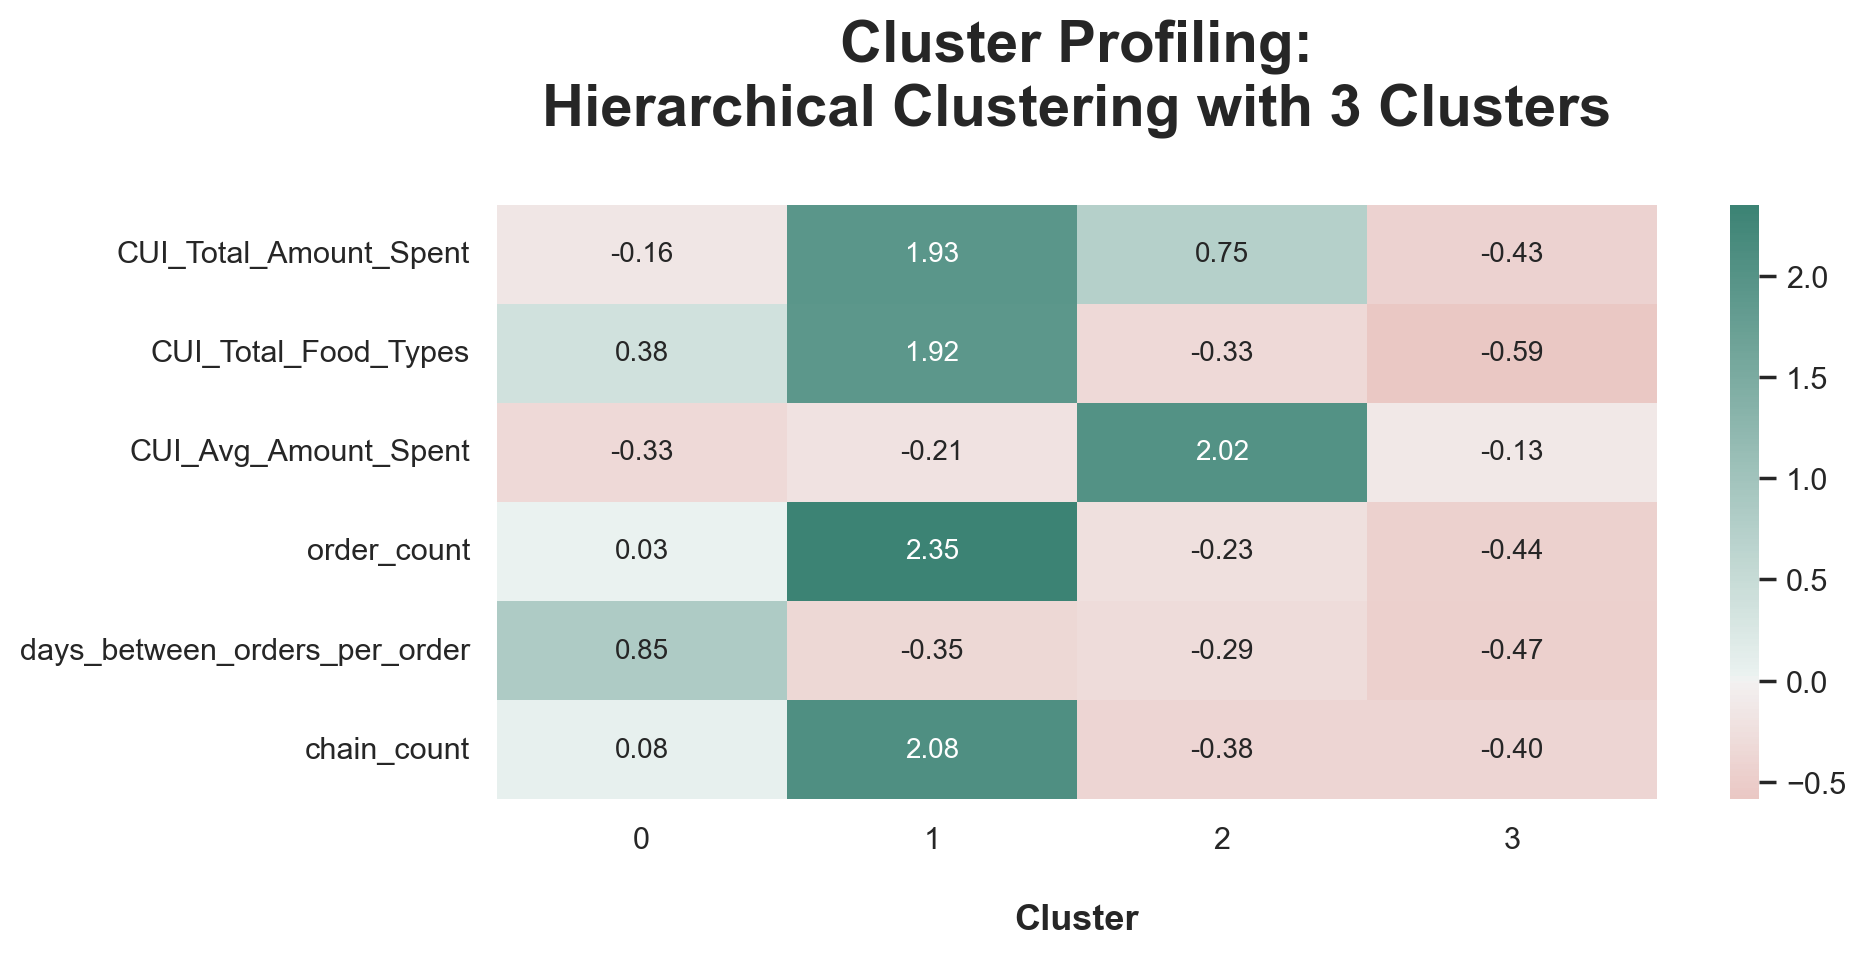

In [330]:
#### Visualize the cluster means as a heatmap to the population means. 
# Explain these values for the population means.
fig, ax = plt.subplots(figsize=(10, 5))

sns.heatmap(df_concat.groupby('labels_value').mean().T, cmap=cmap_, annot=True, fmt=".2f", center= 0, ax=ax, annot_kws={"size": 10})

# Finalize the plot
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('\nCluster', fontsize=13, fontweight='bold')
ax.set_title("Cluster Profiling:\nHierarchical Clustering with 3 Clusters\n", fontsize=21, fontweight='bold')

plt.tight_layout()
fig.savefig('./Clustering_Outputs/Hierarchical_Clustering_ValuePerspective_3_Clusters.png', dpi=300, bbox_inches='tight')
plt.show()

---

## **Behavior-based Segments**

In [256]:
hc_methods = ["ward", "complete", "average", "single"]
max_nclus = 10

r2_hc = np.vstack([get_r2_hc(ABCDEats[behavior_vars], 
                             link, 
                             max_nclus=max_nclus, 
                             min_nclus=1, 
                             dist="euclidean") 
                             for link in hc_methods])

# Create a DataFrame with the R2 values
r2_hc_methods = pd.DataFrame(r2_hc.T, index=range(1, max_nclus + 1), columns=hc_methods)

## Time of Execution = 12m 

100%|██████████| 10/10 [01:08<00:00,  6.88s/it]


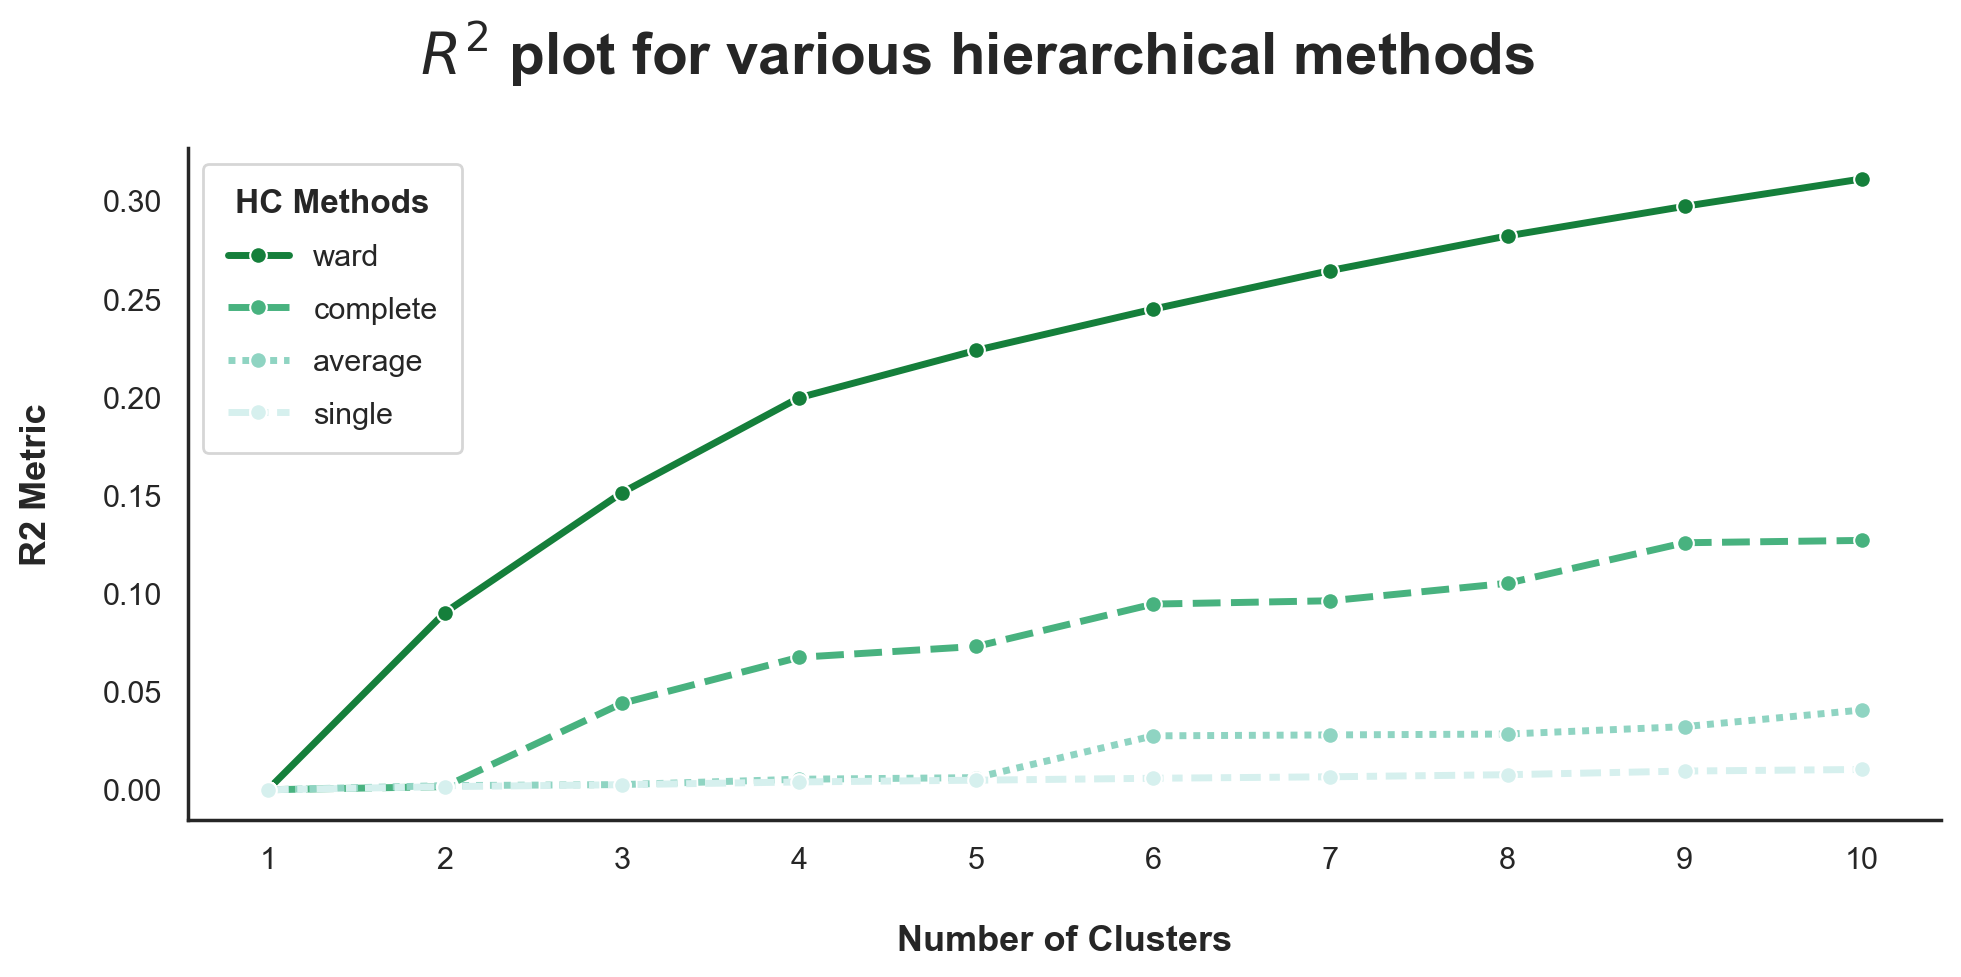

In [ ]:
# Plot the R2 values for the different hierarchical methods
fig = plt.figure(figsize=(10,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4, palette = "BuGn_r")
plt.legend(title="HC Methods", title_fontproperties={'weight':'bold', 'size':'12'}, labelspacing=0.8, borderpad=0.8)
plt.xticks(range(1, max_nclus + 1), fontsize=11)
plt.xlabel("\nNumber of Clusters", fontsize=13, fontweight='bold')
plt.ylabel("R2 Metric\n", fontsize=13, fontweight='bold')
fig.suptitle("$R^2$ plot for various hierarchical methods", fontsize=21, fontweight='bold')

sns.despine(top=True, right=True)
plt.tight_layout()
fig.savefig('./Clustering_Outputs/Hierarchical_Clustering_BehaviorPerspective_R2.png', dpi=300, bbox_inches='tight')
plt.show()

> Based on the plot, the **Ward** method with approximately **$4$ clusters** (elbow point) is recommended.

##### **Defining the Number of Clusters**

In [331]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'

hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(ABCDEats[behavior_vars])

array([27825, 21042, 23527, ...,     3,     1,     0], dtype=int64)

In [332]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

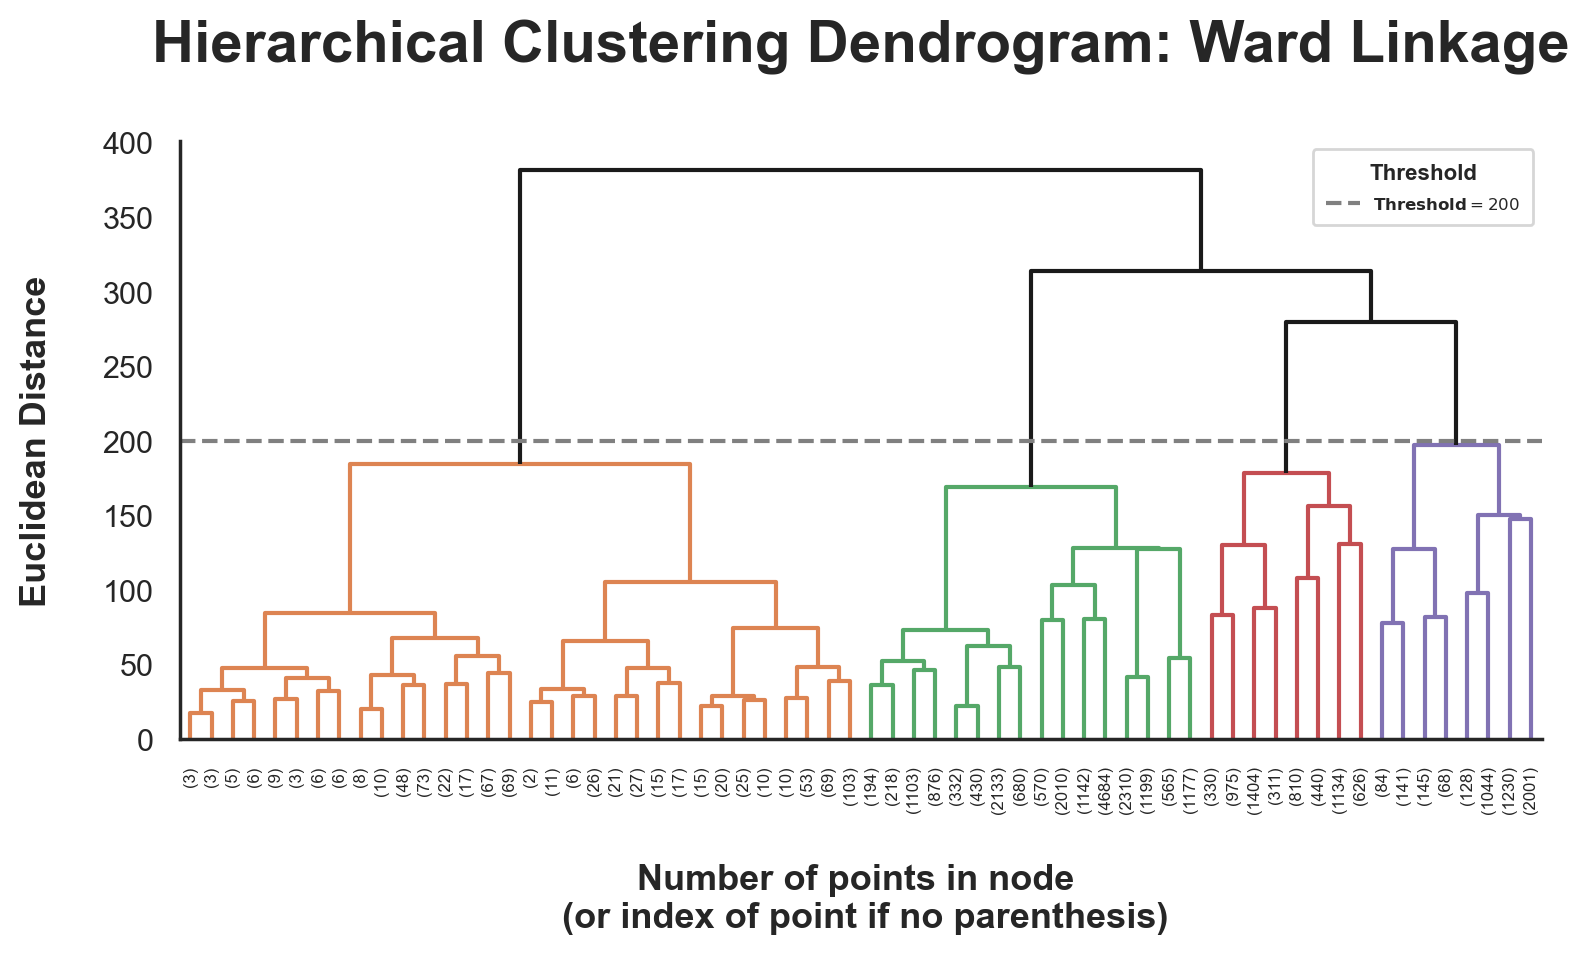

In [333]:
# Plot the corresponding dendrogram
fig = plt.figure(figsize=(8,5))

##########################################
# Visualize the Dendrogram with y_threshold = 200
##########################################

# The Dendrogram parameters need to be tuned
y_threshold = 200
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="grey", linestyles="dashed", label=rf'$\mathbf{{Threshold}} = {y_threshold}$', linewidth=1.5)
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage\n', fontsize=21, fontweight='bold')
plt.xlabel('\nNumber of points in node \n (or index of point if no parenthesis)', fontsize=13, fontweight='bold')
plt.ylabel(f'{distance.title()} Distance\n', fontsize=13, fontweight='bold')
plt.legend(title='Threshold', title_fontproperties={'weight':'bold', 'size':'8'}, labelspacing=0.8, borderpad=0.8, loc='upper right', fontsize=6)

sns.despine(top=True, right=True)
plt.tight_layout()
fig.savefig('./Clustering_Outputs/Hierarchical_Clustering_ValuePerspective_Dendrogram.png', dpi=300, bbox_inches='tight')
plt.show()

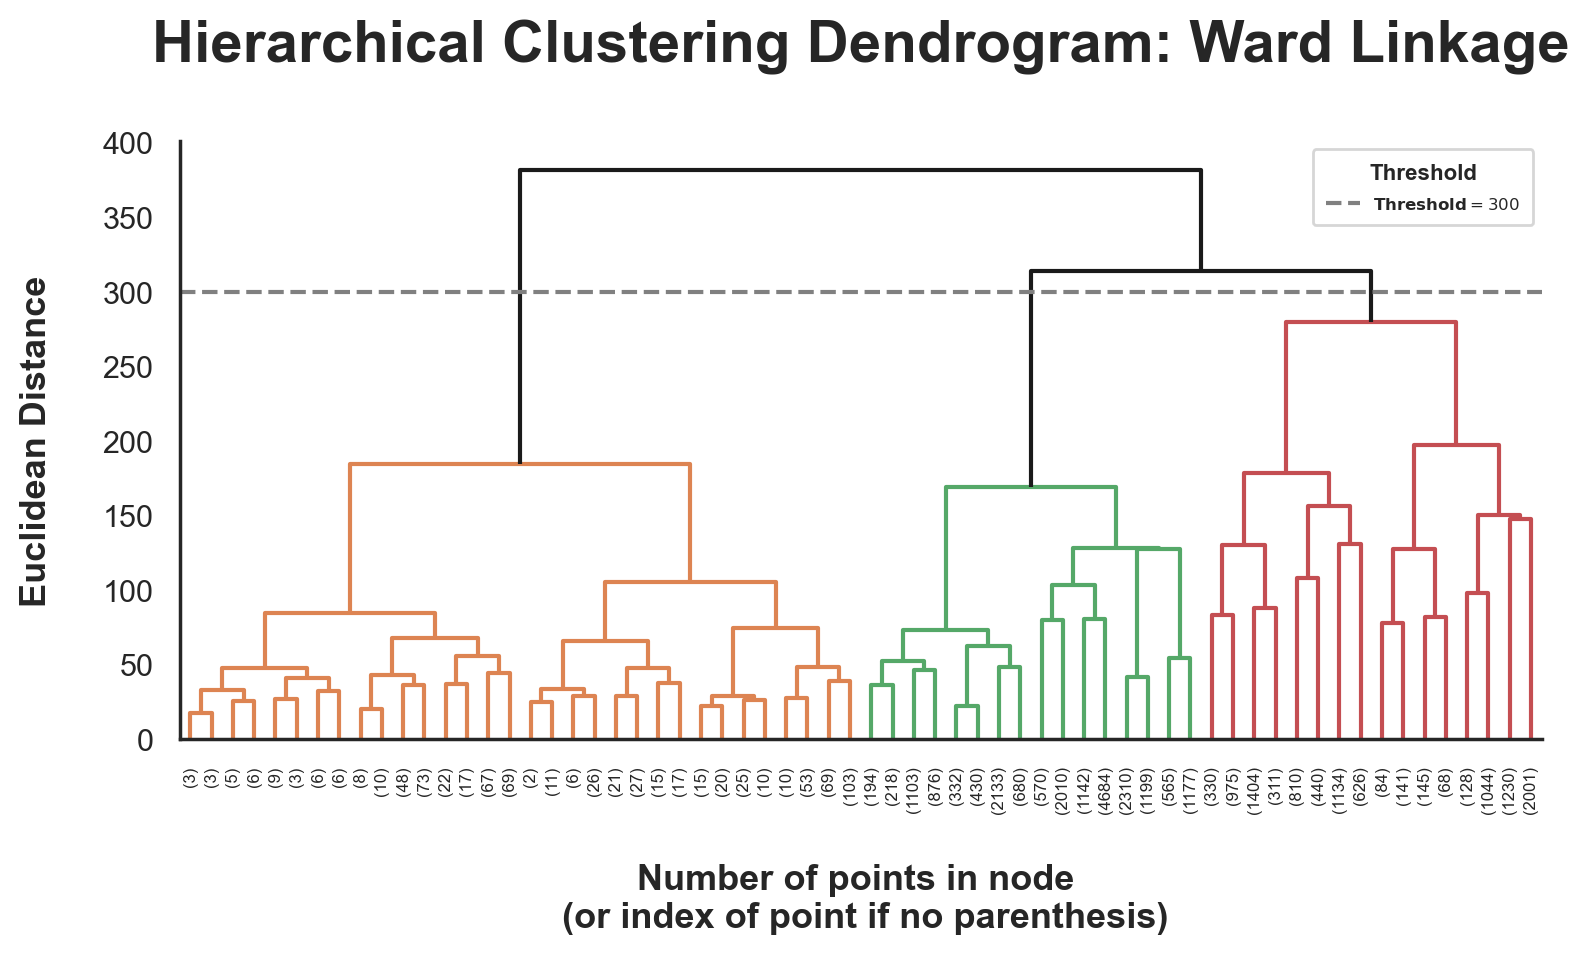

In [334]:
##########################################
# Visualize the Dendrogram with y_threshold = 300
##########################################

fig = plt.figure(figsize=(8,5))
y_threshold = 300
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="grey", linestyles="dashed", label=rf'$\mathbf{{Threshold}} = {y_threshold}$', linewidth=1.5)
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage\n', fontsize=21, fontweight='bold')
plt.xlabel('\nNumber of points in node \n (or index of point if no parenthesis)', fontsize=13, fontweight='bold')
plt.ylabel(f'{distance.title()} Distance\n', fontsize=13, fontweight='bold')
plt.legend(title='Threshold', title_fontproperties={'weight':'bold', 'size':'8'}, labelspacing=0.8, borderpad=0.8, loc='upper right', fontsize=6)

sns.despine(top=True, right=True)
plt.tight_layout()
fig.savefig('./Clustering_Outputs/Hierarchical_Clustering_ValuePerspective_Dendrogram.png', dpi=300, bbox_inches='tight')
plt.show()

---

### **📏 Clustering Evaluation/Analysis**

In [335]:
# Define the clustering parameters (linkage and distance metric)
linkage = 'ward'
distance = 'euclidean'

# 4 Cluster Solution
n_clusters = 4

hc4_clust = AgglomerativeClustering(n_clusters=n_clusters)
hc4_labels = hc4_clust.fit_predict(ABCDEats[behavior_vars])

# Characterizing the 4 clusters
df_concat = pd.concat([ABCDEats[behavior_vars], pd.Series(hc4_labels, name='labels_behaviors', index=ABCDEats.index)], axis=1)
df_concat.groupby('labels_behaviors').mean()

,customer_age,first_order,last_order,CUI_NOTAsian_Italian_OTHER_NOTSnack_PC,CUI_American_Cafe_Japanese_PC,CUI_Chicken_Chinese_Noodle_PC,CUI_Healthy_NOTAmerican_PC,CUI_Indian_PC,CUI_Japanese_NOTBeverages_PC,CUI_Beverages_Thai_PC,HR_Lunch_Dinner_PC,HR_LateNight_Breakfast_PC,HR_Evening_PC,HR_AfternoonSnack_PC,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
labels_behaviors,,,,,,,,,,,,,,,,,,,,,
0,-0.09,-0.29,0.31,-1.31,0.61,0.66,-0.09,0.23,-0.22,0.27,-0.74,1.77,0.34,0.22,0.27,0.24,0.25,0.22,0.12,0.19,0.13
1,0.01,-0.92,0.88,2.49,1.67,2.37,-0.69,-0.48,-0.12,0.06,5.76,1.45,-1.35,0.62,2.27,2.24,2.35,2.46,2.43,1.98,2.11
2,0.03,0.24,-0.26,-0.08,-0.23,-0.37,0.04,-0.16,0.08,-0.02,-0.48,-0.47,-0.04,-0.06,-0.28,-0.28,-0.30,-0.28,-0.26,-0.25,-0.25
3,-0.04,-0.43,0.48,0.98,0.06,0.38,0.03,0.39,-0.06,-0.15,1.41,-0.09,0.03,-0.06,0.39,0.42,0.46,0.42,0.43,0.41,0.43


In [336]:
# Absolute and Relative Frequency of the clusters [Behavior-based Segmentation - 4 Clusters]
cluster_freq = hc4_clust.labels_
cluster_freq = pd.Series(cluster_freq).value_counts().sort_index() 

# Dataframe with the absolute and relative frequency of the clusters
cluster_freq_df = pd.DataFrame({'n': cluster_freq, '%': (cluster_freq/cluster_freq.sum()*100).round(2)})
cluster_freq_df.index.name = 'Cluster'
cluster_freq_df

,n,%
Cluster,,
0,4841,15.48
1,785,2.51
2,19623,62.74
3,6030,19.28


In [337]:
# 3 Cluster Solution
hc3_clust = AgglomerativeClustering(n_clusters=3)
hc3_labels = hc3_clust.fit_predict(ABCDEats[behavior_vars])

# Characterizing the 3 clusters
df_concat = pd.concat([ABCDEats[behavior_vars], pd.Series(hc3_labels, name='labels_behaviors', index=ABCDEats.index)], axis=1)
df_concat.groupby('labels_behaviors').mean()

,customer_age,first_order,last_order,CUI_NOTAsian_Italian_OTHER_NOTSnack_PC,CUI_American_Cafe_Japanese_PC,CUI_Chicken_Chinese_Noodle_PC,CUI_Healthy_NOTAmerican_PC,CUI_Indian_PC,CUI_Japanese_NOTBeverages_PC,CUI_Beverages_Thai_PC,HR_Lunch_Dinner_PC,HR_LateNight_Breakfast_PC,HR_Evening_PC,HR_AfternoonSnack_PC,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
labels_behaviors,,,,,,,,,,,,,,,,,,,,,
0,-0.06,-0.37,0.41,-0.04,0.30,0.51,-0.02,0.32,-0.13,0.04,0.46,0.74,0.17,0.06,0.34,0.34,0.36,0.33,0.29,0.31,0.30
1,0.01,-0.92,0.88,2.49,1.67,2.37,-0.69,-0.48,-0.12,0.06,5.76,1.45,-1.35,0.62,2.27,2.24,2.35,2.46,2.43,1.98,2.11
2,0.03,0.24,-0.26,-0.08,-0.23,-0.37,0.04,-0.16,0.08,-0.02,-0.48,-0.47,-0.04,-0.06,-0.28,-0.28,-0.30,-0.28,-0.26,-0.25,-0.25


In [338]:
# Absolute and Relative Frequency of the clusters [Behavior-based Segmentation - 3 Clusters]
cluster_freq = hc3_clust.labels_
cluster_freq = pd.Series(cluster_freq).value_counts().sort_index()

# Dataframe with the absolute and relative frequency of the clusters
cluster_freq_df = pd.DataFrame({'n': cluster_freq, '%': (cluster_freq/cluster_freq.sum()*100).round(2)})
cluster_freq_df.index.name = 'Cluster'
cluster_freq_df

,n,%
Cluster,,
0,10871,34.75
1,785,2.51
2,19623,62.74


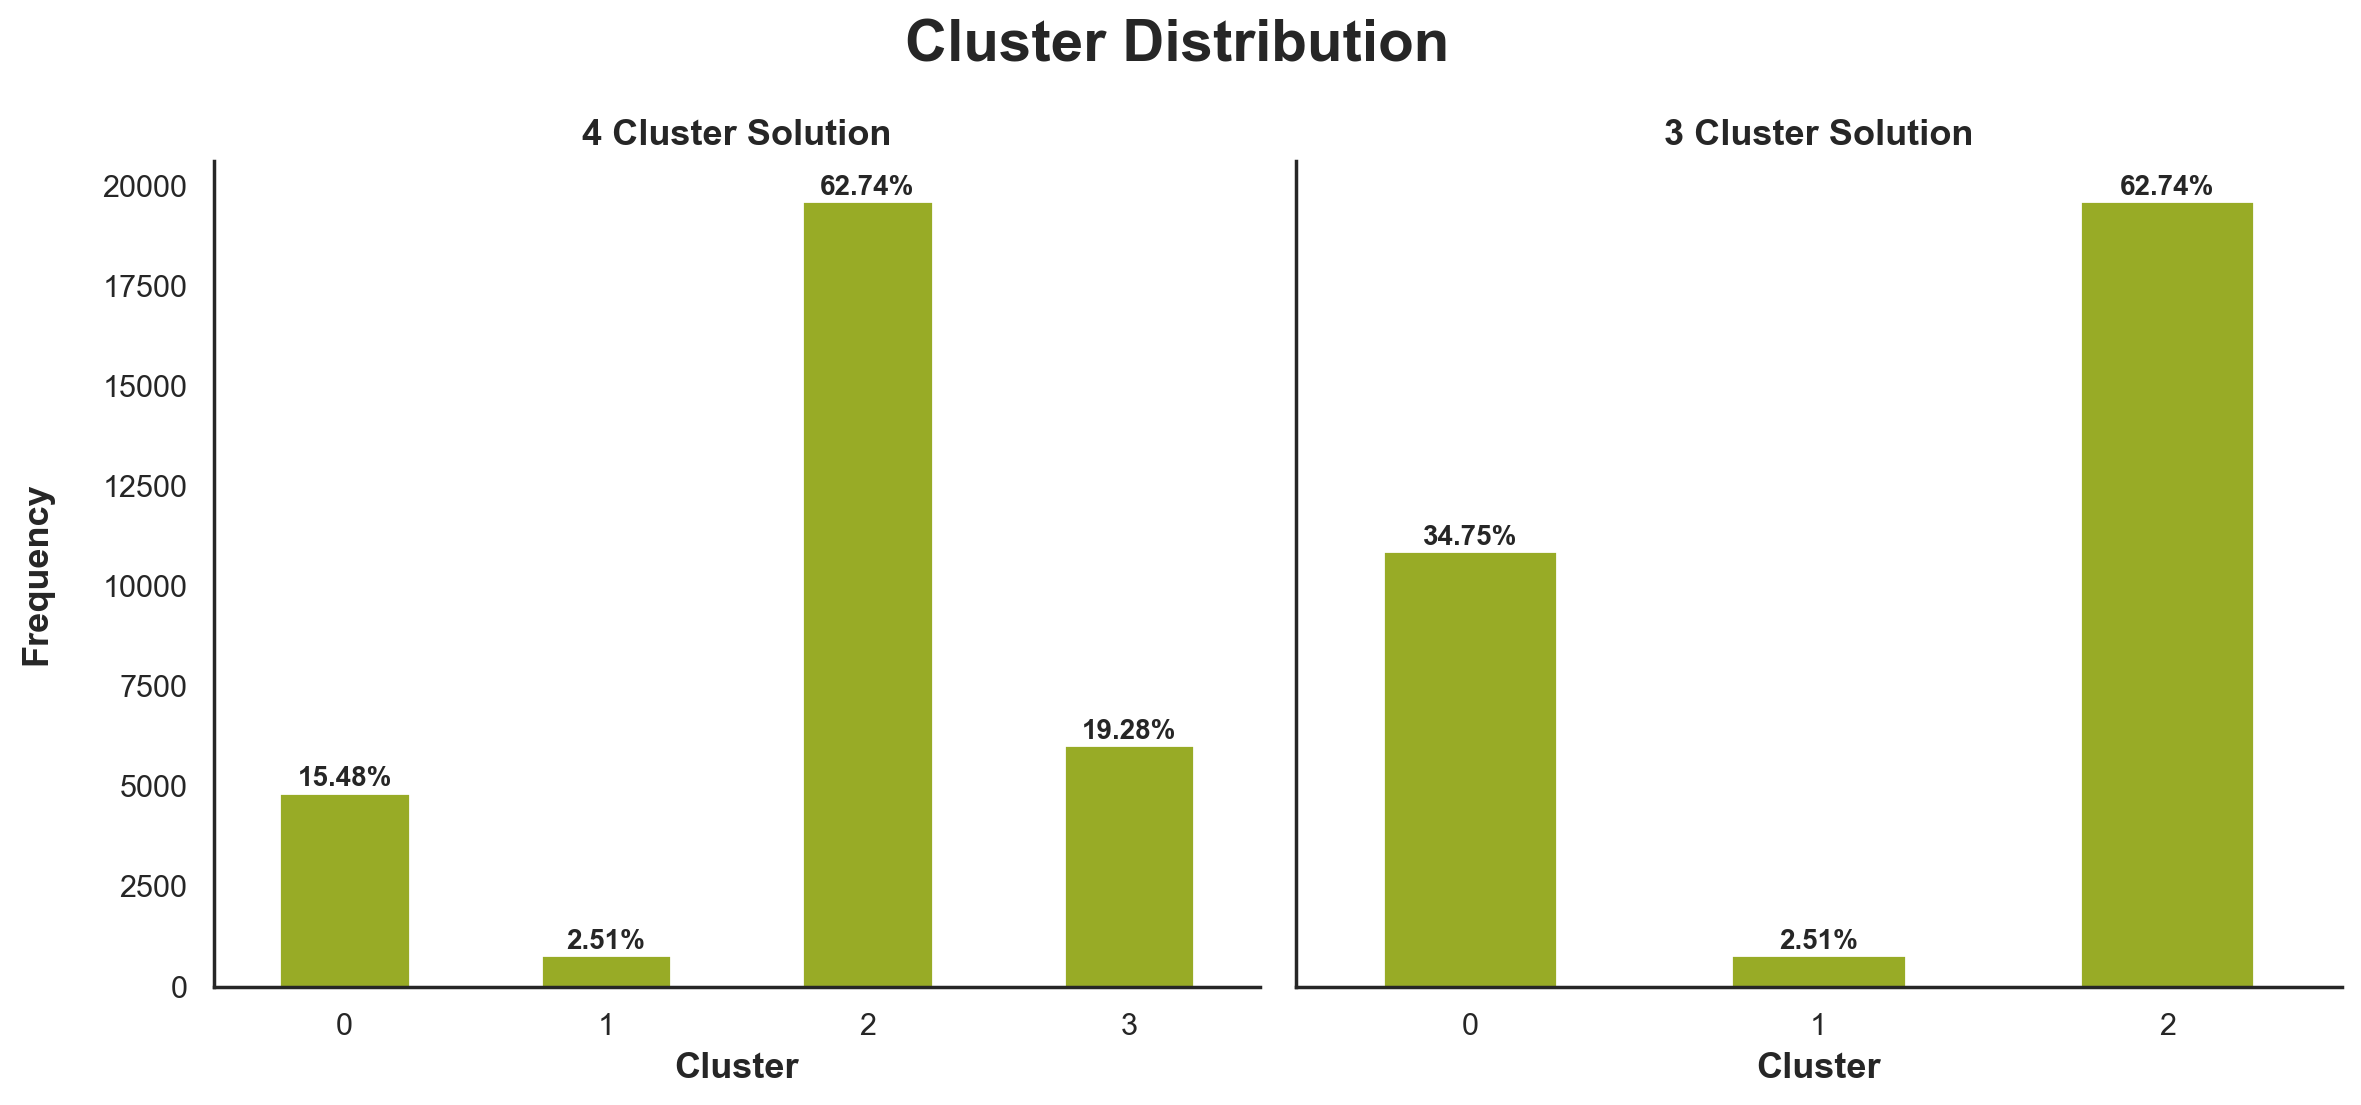

In [339]:
## Barplot of the clusters (4 & 3 solutions in %)
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# 4 Cluster Solution
cluster_freq = hc4_clust.labels_
cluster_freq = pd.Series(cluster_freq).value_counts().sort_index() 

cluster_freq.plot(kind='bar', ax=ax[0], color=NOVAIMS_palette_colors[1])
ax[0].set_title('4 Cluster Solution', fontsize=13, fontweight='bold')
ax[0].set_xlabel('Cluster', fontsize=13, fontweight='bold')
ax[0].set_ylabel('Frequency\n', fontsize=13, fontweight='bold')
ax[0].set_xticklabels(ax[0].get_xticks(), rotation=0)

# Add the percentage above the bars
for i in ax[0].patches:
    ax[0].text(i.get_x() + i.get_width()/2, i.get_height() + 5, f'{i.get_height()/cluster_freq.sum()*100:.2f}%', 
               ha='center', va='bottom', fontsize=10, fontweight='bold')
    
# 3 Cluster Solution
cluster_freq = hc3_clust.labels_
cluster_freq = pd.Series(cluster_freq).value_counts().sort_index()

cluster_freq.plot(kind='bar', ax=ax[1], color=NOVAIMS_palette_colors[1])
ax[1].set_title('3 Cluster Solution', fontsize=13, fontweight='bold')
ax[1].set_xlabel('Cluster', fontsize=13, fontweight='bold')
ax[1].set_xticklabels(ax[1].get_xticks(), rotation=0)

# Add the percentage above the bars
for i in ax[1].patches:
    ax[1].text(i.get_x() + i.get_width()/2, i.get_height() + 5, f'{i.get_height()/cluster_freq.sum()*100:.2f}%', 
               ha='center', va='bottom', fontsize=10, fontweight='bold')
    
plt.suptitle('Cluster Distribution\n', fontsize=21, fontweight='bold', y=0.92)
sns.despine(right=True, top=True)
plt.tight_layout()
plt.show()

In [340]:
## See crosstab of 4 vs 3
## What does this mean?

pd.crosstab(pd.Series(hc3_labels, name='hc3_labels', index=ABCDEats.index),
            pd.Series(hc4_labels, name='hc4_labels', index=ABCDEats.index))

hc4_labels,0,1,2,3
hc3_labels,,,,
0,4841,0,0,6030
1,0,785,0,0
2,0,0,19623,0


### **Final Hierarchical clustering solution**

> Based on the cluster distribution and the need for a more balanced segmentation, the 2nd solution - **$threshold = 300 \Rightarrow 3$ clusters** - appears to be the best choice. It offers a more balanced distribution of data across clusters, which is generally desirable in hierarchical clustering analysis.

In [341]:
# Save the final solution to ABCDEats dataset
ABCDEats = pd.concat([ABCDEats, pd.Series(hc3_labels, name='labels_behaviors', index=ABCDEats.index)], axis=1)

In [342]:
# Absolute and Relative Frequency of the 3 Cluster Solution
cluster_counts = pd.Series(hc3_labels).value_counts().sort_index()
cluster_freq = pd.Series(hc3_labels).value_counts(normalize=True).sort_index() * 100

# Create a DataFrame with the absolute and relative frequency of the clusters
cluster_freq_df = pd.concat([cluster_counts, cluster_freq], axis=1)
cluster_freq_df.columns = ['n', '%']
cluster_freq_df.index.name = 'Cluster'
cluster_freq_df

,n,%
Cluster,,
0,10871,34.75
1,785,2.51
2,19623,62.74


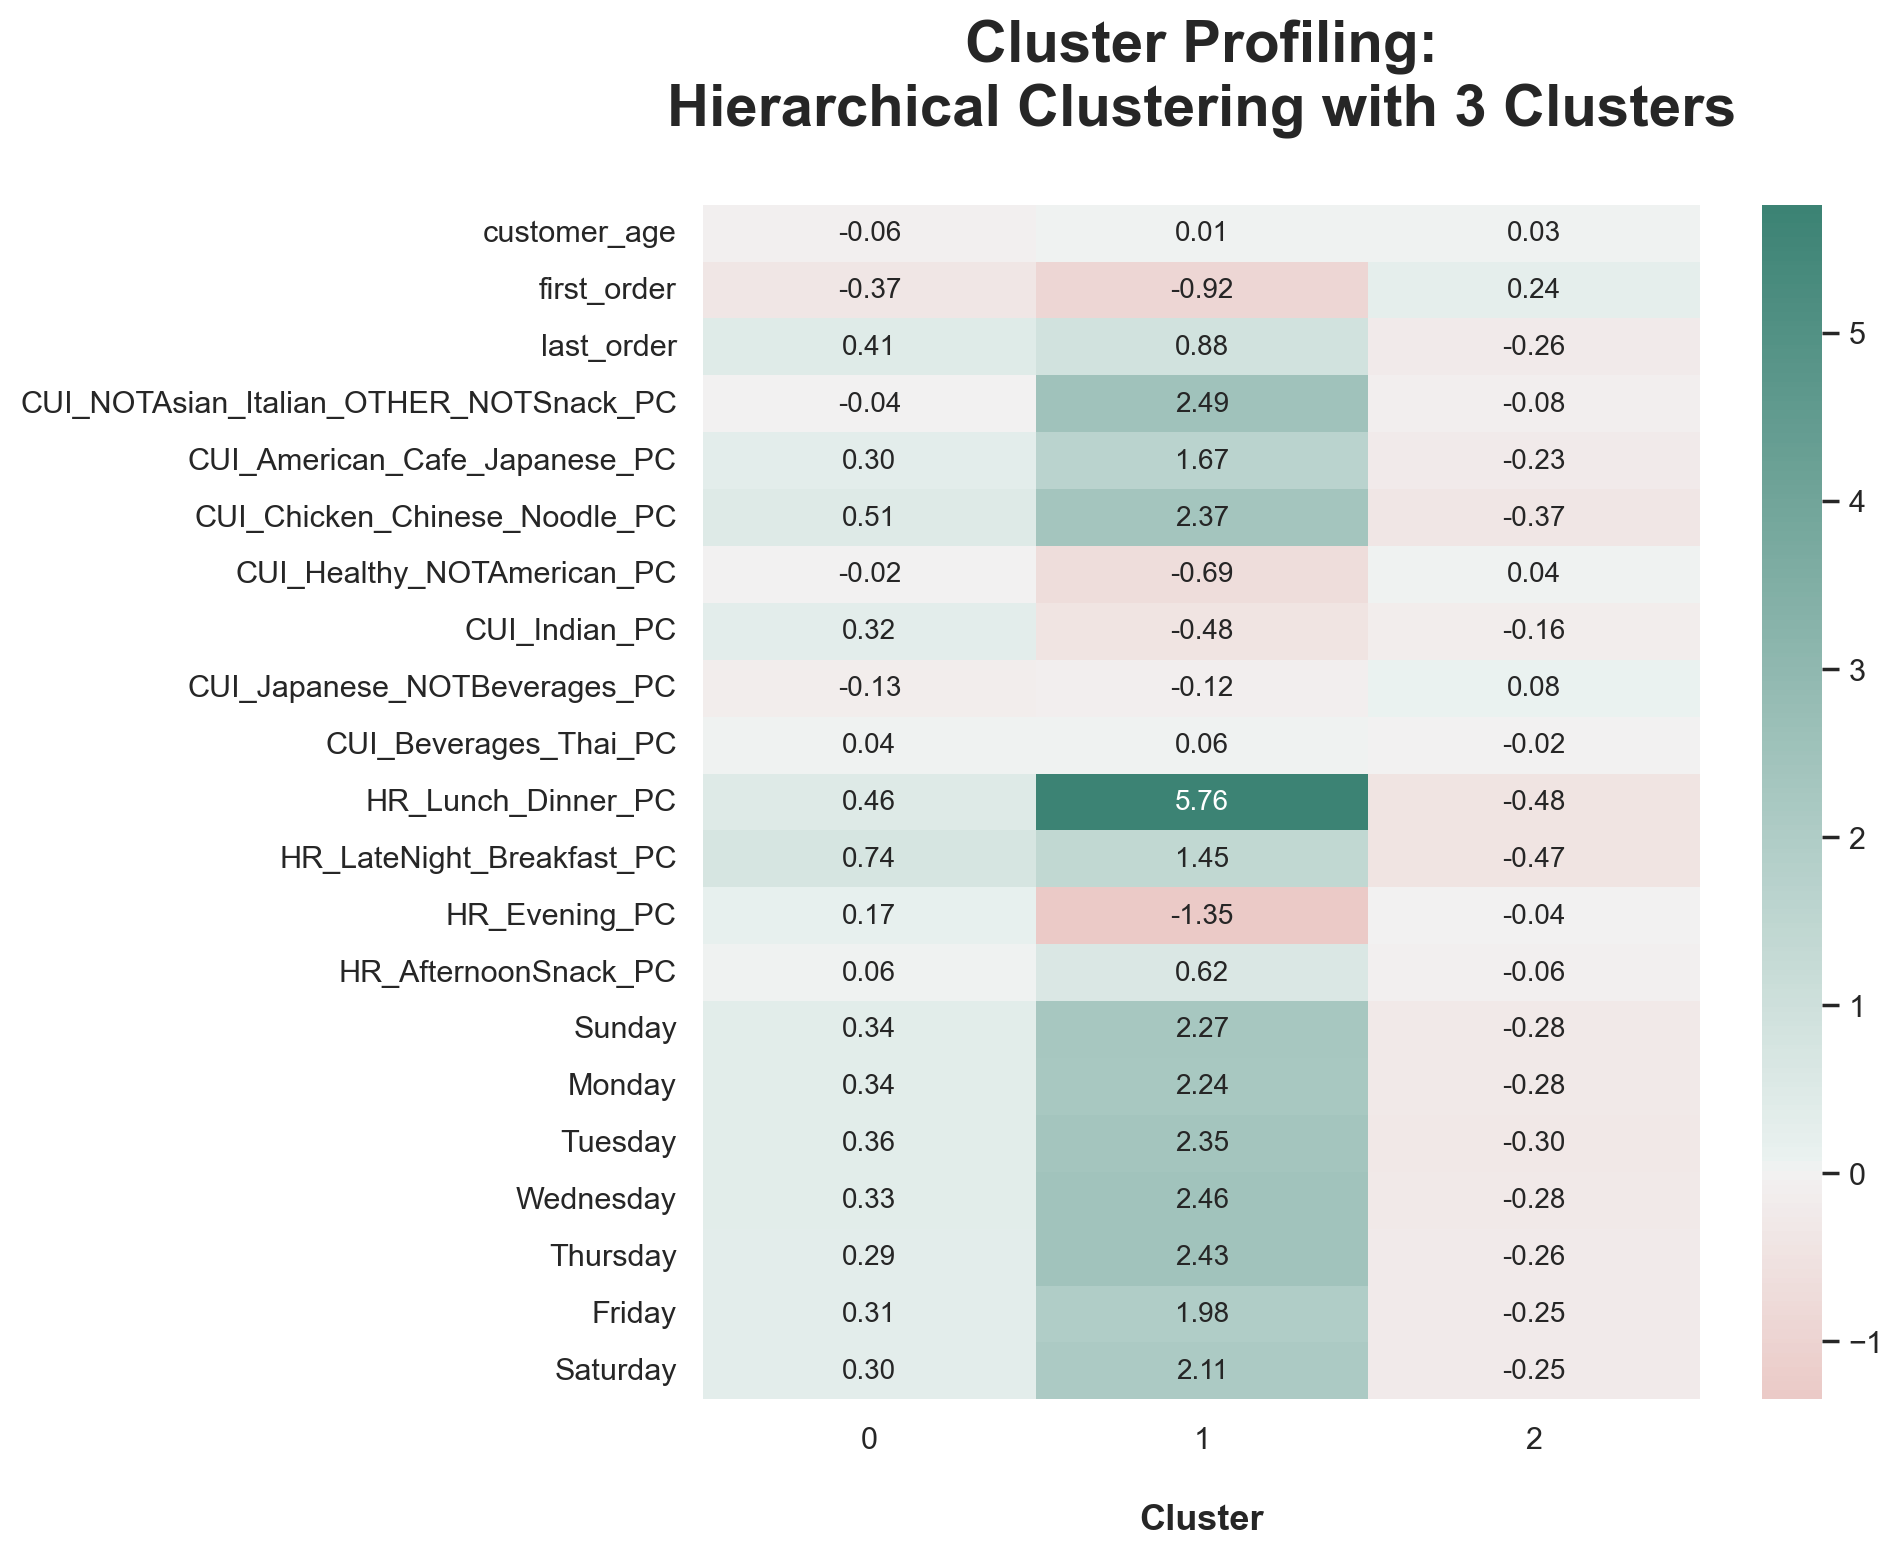

In [343]:
#### Visualize the cluster means as a heatmap to the population means. 
# Explain these values for the population means.
fig, ax = plt.subplots(figsize=(10, 8))

df_concat = pd.concat([ABCDEats[behavior_vars], pd.Series(hc3_labels, name='labels_behaviors', index=ABCDEats.index)], axis=1)
sns.heatmap(df_concat.groupby('labels_behaviors').mean().T, cmap=cmap_, annot=True, fmt=".2f", center= 0, ax=ax, annot_kws={"size": 10})

# Finalize the plot
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('\nCluster', fontsize=13, fontweight='bold')
ax.set_title("Cluster Profiling:\nHierarchical Clustering with 3 Clusters\n", fontsize=21, fontweight='bold')

plt.tight_layout()
fig.savefig('./Clustering_Outputs/Hierarchical_Clustering_BehaviorPerspective_3_Clusters.png', dpi=300, bbox_inches='tight')
plt.show()

---

## **💾 Save ***Hierarchical Clustering*** Solution** 

In [352]:
# Save the cluster labels of the 4 Cluster Solution [Hierarchical Clustering] to a parquet file [index + labels]
ABCDEats[['labels', 'labels_value', 'labels_behaviors']].to_parquet('data/DM2423_ABCDEats_HierarchicalClustering.parquet', index=True)

---